# This is homework 4 of Machine Learning
### Time Series Classification: Feature Selection
### Time Series Classification: Binary and Multiclass Classification
#### William Lu
#### 7424831487
#### WilliamLu1999


In [1]:
### set up and download
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import glob
import os
import math

##### 1 (a) (b) Processing Data
Choosing the test and train data

Need to skip the first 4 rows as they are empty and interruptive

In [2]:
bending1_path=['../data/Arem/bending1/dataset1.csv','../data/Arem/bending1/dataset2.csv','../data/Arem/bending1/dataset3.csv',
               '../data/Arem/bending1/dataset4.csv','../data/Arem/bending1/dataset5.csv','../data/Arem/bending1/dataset6.csv',
               '../data/Arem/bending1/dataset7.csv']
bending1_df=[]

In [3]:
for file in bending1_path:
    bending1_df.append(pd.read_csv(file,skiprows=4))
final_bending1 = pd.concat(bending1_df, ignore_index=True)

In [4]:
final_bending1['label']='bending1'

In [5]:
final_bending1

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,bending1
...,...,...,...,...,...,...,...,...
3355,118750,44.25,0.83,16.25,1.30,24.00,0.00,bending1
3356,119000,44.00,0.71,11.00,1.00,24.00,0.00,bending1
3357,119250,44.25,0.43,10.25,1.30,22.75,0.83,bending1
3358,119500,43.75,0.43,7.33,2.87,21.50,0.50,bending1


In [6]:
bending2_path = ['../data/Arem/bending2/dataset1.csv','../data/Arem/bending2/dataset2.csv','../data/Arem/bending2/dataset3.csv','../data/Arem/bending2/dataset5.csv','../data/Arem/bending2/dataset6.csv']

In [7]:
bending2_df=[]
for file in bending2_path:
    bending2_df.append(pd.read_csv(file,skiprows=4))
# add dataset 4 separately since it is corrupted
bending2_df.append(pd.read_csv('../data/Arem/bending2/dataset4.csv',sep=' ',names=['# Columns: time',
                                                                'avg_rss12',
                                                                 'var_rss12','avg_rss13',
                                                                 'var_rss13','avg_rss23',
                                                                 'var_rss23'],skiprows=5,index_col=False))
## !!! we need to concat again because dataset 4 in bending2 folder has bad separator ' '.
## we need to concatenate them at the end of bending2_df

In [8]:
final_bending2 = pd.concat(bending2_df, ignore_index=True)

In [9]:
final_bending2['label']='bending2'

In [10]:
# remove the last comma in dataset9 and 14 of cycling by hands already
cycling_path=['../data/Arem/cycling/dataset1.csv','../data/Arem/cycling/dataset2.csv','../data/Arem/cycling/dataset3.csv',
             '../data/Arem/cycling/dataset4.csv','../data/Arem/cycling/dataset5.csv','../data/Arem/cycling/dataset6.csv',
             '../data/Arem/cycling/dataset7.csv','../data/Arem/cycling/dataset8.csv','../data/Arem/cycling/dataset9.csv',
             '../data/Arem/cycling/dataset10.csv','../data/Arem/cycling/dataset11.csv','../data/Arem/cycling/dataset12.csv',
             '../data/Arem/cycling/dataset13.csv','../data/Arem/cycling/dataset14.csv','../data/Arem/cycling/dataset14.csv']

In [11]:
cycling_df=[]
for file in cycling_path:
    cycling_df.append(pd.read_csv(file,skiprows=4))
final_cycling = pd.concat(cycling_df, ignore_index=True)

In [12]:
final_cycling['label']='cycling'

In [13]:
lying_path=['../data/Arem/lying/dataset1.csv','../data/Arem/lying/dataset2.csv','../data/Arem/lying/dataset3.csv',
             '../data/Arem/lying/dataset4.csv','../data/Arem/lying/dataset5.csv','../data/Arem/lying/dataset6.csv',
             '../data/Arem/lying/dataset7.csv','../data/Arem/lying/dataset8.csv','../data/Arem/lying/dataset9.csv',
             '../data/Arem/lying/dataset10.csv','../data/Arem/lying/dataset11.csv','../data/Arem/lying/dataset12.csv',
             '../data/Arem/lying/dataset13.csv','../data/Arem/lying/dataset14.csv','../data/Arem/lying/dataset15.csv']

In [14]:
lying_df=[]
for file in lying_path:
    lying_df.append(pd.read_csv(file,skiprows=4))
final_lying = pd.concat(lying_df, ignore_index=True)

In [15]:
final_lying['label']='lying'

In [16]:
sitting_path=['../data/Arem/sitting/dataset1.csv','../data/Arem/sitting/dataset2.csv','../data/Arem/sitting/dataset3.csv',
             '../data/Arem/sitting/dataset4.csv','../data/Arem/sitting/dataset5.csv','../data/Arem/sitting/dataset6.csv',
             '../data/Arem/sitting/dataset7.csv','../data/Arem/sitting/dataset8.csv','../data/Arem/sitting/dataset9.csv',
             '../data/Arem/sitting/dataset10.csv','../data/Arem/sitting/dataset11.csv','../data/Arem/sitting/dataset12.csv',
             '../data/Arem/sitting/dataset13.csv','../data/Arem/sitting/dataset14.csv','../data/Arem/sitting/dataset15.csv']

In [17]:
sitting_df=[]
for file in sitting_path:
    sitting_df.append(pd.read_csv(file,skiprows=4))
final_sitting = pd.concat(sitting_df, ignore_index=True)

In [18]:
final_sitting['label']='sitting'
# final_sitting has 1 missing row.
# final_sitting.loc[final_sitting.avg_rss12==None]

In [19]:
standing_path=['../data/Arem/standing/dataset1.csv','../data/Arem/standing/dataset2.csv','../data/Arem/standing/dataset3.csv',
             '../data/Arem/standing/dataset4.csv','../data/Arem/standing/dataset5.csv','../data/Arem/standing/dataset6.csv',
             '../data/Arem/standing/dataset7.csv','../data/Arem/standing/dataset8.csv','../data/Arem/standing/dataset9.csv',
             '../data/Arem/standing/dataset10.csv','../data/Arem/standing/dataset11.csv','../data/Arem/standing/dataset12.csv',
             '../data/Arem/standing/dataset13.csv','../data/Arem/standing/dataset14.csv','../data/Arem/standing/dataset15.csv']

In [20]:
standing_df=[]
for file in standing_path:
    standing_df.append(pd.read_csv(file,skiprows=4))
final_standing = pd.concat(standing_df, ignore_index=True)

In [21]:
final_standing['label']='standing'

In [22]:
walking_path=['../data/Arem/walking/dataset1.csv','../data/Arem/walking/dataset2.csv','../data/Arem/walking/dataset3.csv',
             '../data/Arem/walking/dataset4.csv','../data/Arem/walking/dataset5.csv','../data/Arem/walking/dataset6.csv',
             '../data/Arem/walking/dataset7.csv','../data/Arem/walking/dataset8.csv','../data/Arem/walking/dataset9.csv',
             '../data/Arem/walking/dataset10.csv','../data/Arem/walking/dataset11.csv','../data/Arem/walking/dataset12.csv',
             '../data/Arem/walking/dataset13.csv','../data/Arem/walking/dataset14.csv','../data/Arem/walking/dataset15.csv']

In [23]:
walking_df=[]
for file in walking_path:
    walking_df.append(pd.read_csv(file,skiprows=4))
final_walking = pd.concat(walking_df, ignore_index=True)

In [24]:
final_walking['label']='walking'

In [25]:
# combine training data from all dataframes
# since each dataset contain 480 rows, so we need to select 960 rows for bending1 and bending2 as training data
bending1_test = final_bending1.iloc[0:960,::] 
bending2_test = final_bending2.iloc[0:960,::]
# first three datasets of the remaining folders will be test data, so 1440 rows
cycling_test = final_cycling.iloc[0:1440,::]
lying_test = final_lying.iloc[0:1440,::]
sitting_test = final_sitting.iloc[0:1440,::]
standing_test = final_standing.iloc[0:1440,::]
walking_test = final_walking.iloc[0:1440,::]
test_data = pd.concat([bending1_test,bending2_test,cycling_test,lying_test,sitting_test,standing_test,walking_test],axis=0,ignore_index=True)
test_data

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,bending1
...,...,...,...,...,...,...,...,...
9115,118750,36.00,2.45,17.00,5.10,20.50,0.87,walking
9116,119000,34.33,1.89,15.00,2.45,17.00,2.12,walking
9117,119250,33.00,7.35,14.60,3.14,13.00,5.70,walking
9118,119500,31.67,1.25,11.00,6.16,19.25,2.17,walking


In [26]:
# now we get the training data from the remaining rows of each dataset
bending1_train = final_bending1.iloc[960::,::] 
bending2_train = final_bending2.iloc[960::,::]
cycling_train = final_cycling.iloc[1440::,::]
lying_train = final_lying.iloc[1440::,::]
sitting_train = final_sitting.iloc[1440::,::]
standing_train = final_standing.iloc[1440::,::]
walking_train = final_walking.iloc[1440::,::]

In [27]:
train_data = pd.concat([bending1_train,bending2_train,cycling_train,lying_train,sitting_train,standing_train,walking_train],axis=0,ignore_index=True)
train_data

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,42.00,0.71,21.25,0.43,30.00,0.00,bending1
1,250,41.50,0.50,20.25,1.48,31.25,1.09,bending1
2,500,41.50,0.50,14.25,1.92,33.00,0.00,bending1
3,750,40.75,0.83,15.75,0.43,33.00,0.00,bending1
4,1000,40.00,0.71,20.00,2.74,32.75,0.43,bending1
...,...,...,...,...,...,...,...,...
33114,118750,34.50,6.18,9.00,3.56,12.67,4.19,walking
33115,119000,25.75,6.02,13.75,2.05,16.00,1.58,walking
33116,119250,31.50,3.35,10.25,5.12,16.25,2.95,walking
33117,119500,33.75,2.77,14.00,3.24,13.75,0.43,walking


##### 1 (c) i.  What types of time-domain features are usually used in time series classification?

Minimum, maximum, mean, median, standard deviation, first quartile, third quartile, stationarity, entropy.

##### 1(c) ii Extract time domain features for each of the dataset

We have 88 datasets. For each dataset, each column needs to be calculated for min, max, mean, median, standard deviation, first quartile, and third quartile. And there are 6 columns need to be done for this for each dataset.

In [28]:
bending1_table=[]
bending1_f = []
for file in bending1_path:
    bending1_items =pd.read_csv(file,skiprows=4).iloc[::,1:7].describe()
    bending1_table.append(bending1_items[1::][::]) # getting rid of count
for f in bending1_table:
    f = f.reindex(['min','max','mean','50%','std','25%','75%'])
    f = f.rename({'50%':'median','25%':'first quartile','75%':'third quartile','std':'standard deviation'})
    bending1_f.append(f)

In [29]:
arr=[]
for f in bending1_f:
    f= list(f.to_numpy().T.flatten()) # f is the describe table of each dataset
    arr.append(f)
sum_df = pd.DataFrame(columns=['min_1', 'max_1','mean_1','median_1','standard deviation_1','1st quart_1','3rd quart_1',
                              'min_2', 'max_2','mean_2','median_2','standard deviation_2','1st quart_2','3rd quart_2',
                              'min_3', 'max_3','mean_3','median_3','standard deviation_3','1st quart_3','3rd quart_3',
                              'min_4', 'max_4','mean_4','median_4','standard deviation_4','1st quart_4','3rd quart_4',
                              'min_5', 'max_5','mean_5','median_5','standard deviation_5','1st quart_5','3rd quart_5',
                              'min_6', 'max_6','mean_6','median_6','standard deviation_6','1st quart_6','3rd quart_6'], data=arr)

In [30]:
bending2_table=[]
bending2_f = []
for file in bending2_path:
    bending2_items =pd.read_csv(file,skiprows=4).iloc[::,1:7].describe()
    bending2_table.append(bending2_items[1::][::]) # getting rid of count
# we need to append the dataset 4 of the bending2 folder...
bending2_d4 =pd.read_csv('../data/Arem/bending2/dataset4.csv',sep=' ',names=['# Columns: time',
                                                                'avg_rss12',
                                                                 'var_rss12','avg_rss13',
                                                                 'var_rss13','avg_rss23',
                                                                 'var_rss23'],skiprows=5,index_col=False).iloc[::,1:7].describe()
bending2_table.append(bending2_d4[1::][::])
for f in bending2_table:
    f = f.reindex(['min','max','mean','50%','std','25%','75%'])
    f = f.rename({'50%':'median','25%':'first quartile','75%':'third quartile','std':'standard deviation'})
    bending2_f.append(f)

In [31]:
lll =pd.read_csv('../data/Arem/bending2/dataset4.csv',sep=' ',names=['# Columns: time',
                                                                'avg_rss12',
                                                                 'var_rss12','avg_rss13',
                                                                 'var_rss13','avg_rss23',
                                                                 'var_rss23'],skiprows=5,index_col=False)
lll

,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,32.50,0.50,0.00,0.00,19.00,1.00
1,250,32.50,0.50,0.00,0.00,18.50,0.50
2,500,32.75,0.43,1.00,0.00,18.00,0.00
3,750,32.50,0.50,0.00,0.00,17.50,0.50
4,1000,32.50,0.50,7.50,0.50,17.50,0.87
...,...,...,...,...,...,...,...
475,118750,28.67,0.47,4.67,1.25,17.33,0.47
476,119000,27.50,0.50,5.50,2.50,17.25,1.30
477,119250,28.00,0.00,6.67,0.94,17.00,1.00
478,119500,28.00,0.00,5.00,0.82,17.00,0.71


In [32]:
arr_b2=[]
for f in bending2_f:
    f= list(f.to_numpy().T.flatten()) # f is the describe table of each dataset
    arr_b2.append(f)
#arr_b2=pd.DataFrame(data=arr_b2)
#sum_df=pd.concat([sum_df, arr_b2], ignore_index=True,axis=0)
sum_df2 = pd.DataFrame(columns=['min_1', 'max_1','mean_1','median_1','standard deviation_1','1st quart_1','3rd quart_1',
                              'min_2', 'max_2','mean_2','median_2','standard deviation_2','1st quart_2','3rd quart_2',
                              'min_3', 'max_3','mean_3','median_3','standard deviation_3','1st quart_3','3rd quart_3',
                              'min_4', 'max_4','mean_4','median_4','standard deviation_4','1st quart_4','3rd quart_4',
                              'min_5', 'max_5','mean_5','median_5','standard deviation_5','1st quart_5','3rd quart_5',
                              'min_6', 'max_6','mean_6','median_6','standard deviation_6','1st quart_6','3rd quart_6'], data=arr_b2)

In [33]:
cycling_table=[]
cycling_f = []
for file in cycling_path:
    cycling_items =pd.read_csv(file,skiprows=4).iloc[::,1:7].describe()
    cycling_table.append(cycling_items[1::][::]) # getting rid of count
for f in cycling_table:
    f = f.reindex(['min','max','mean','50%','std','25%','75%'])
    f = f.rename({'50%':'median','25%':'first quartile','75%':'third quartile','std':'standard deviation'})
    cycling_f.append(f)

In [34]:
arr_cycling=[]
for f in cycling_f:
    f= list(f.to_numpy().T.flatten()) # f is the describe table of each dataset
    arr_cycling.append(f)
sum_df3 = pd.DataFrame(columns=['min_1', 'max_1','mean_1','median_1','standard deviation_1','1st quart_1','3rd quart_1',
                              'min_2', 'max_2','mean_2','median_2','standard deviation_2','1st quart_2','3rd quart_2',
                              'min_3', 'max_3','mean_3','median_3','standard deviation_3','1st quart_3','3rd quart_3',
                              'min_4', 'max_4','mean_4','median_4','standard deviation_4','1st quart_4','3rd quart_4',
                              'min_5', 'max_5','mean_5','median_5','standard deviation_5','1st quart_5','3rd quart_5',
                              'min_6', 'max_6','mean_6','median_6','standard deviation_6','1st quart_6','3rd quart_6'], data=arr_cycling)

In [35]:
lying_table=[]
lying_f = []
for file in lying_path:
    lying_items =pd.read_csv(file,skiprows=4).iloc[::,1:7].describe()
    lying_table.append(lying_items[1::][::]) # getting rid of count
for f in lying_table:
    f = f.reindex(['min','max','mean','50%','std','25%','75%'])
    f = f.rename({'50%':'median','25%':'first quartile','75%':'third quartile','std':'standard deviation'})
    lying_f.append(f)

In [36]:
lying_table

[      avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
 mean  27.716375   0.363688   6.078563   0.871021   8.337438   0.734271
 std    1.442253   0.394817   3.468994   0.777400   4.074511   0.613688
 min   23.500000   0.000000   0.000000   0.000000   0.000000   0.000000
 25%   27.000000   0.000000   3.500000   0.430000   5.500000   0.430000
 50%   27.500000   0.430000   6.250000   0.820000   8.750000   0.710000
 75%   29.000000   0.500000   8.330000   1.262500  10.750000   1.000000
 max   30.000000   1.790000  13.250000   5.020000  21.000000   4.500000,
       avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
 mean  44.182937   0.101875   6.679958   0.584104   4.376292   0.692771
 std    7.495615   0.346756   1.936492   0.749945   3.274539   0.675781
 min   24.750000   0.000000   1.000000   0.000000   0.000000   0.000000
 25%   48.000000   0.000000   5.670000   0.000000   2.000000   0.322500
 50%   48.000000   0.000000   6.250000   0.430000   3.330000   

In [37]:
arr_lying=[]
for f in lying_f:
    f= list(f.to_numpy().T.flatten()) # f is the describe table of each dataset
    arr_lying.append(f)
sum_df4 = pd.DataFrame(columns=['min_1', 'max_1','mean_1','median_1','standard deviation_1','1st quart_1','3rd quart_1',
                              'min_2', 'max_2','mean_2','median_2','standard deviation_2','1st quart_2','3rd quart_2',
                              'min_3', 'max_3','mean_3','median_3','standard deviation_3','1st quart_3','3rd quart_3',
                              'min_4', 'max_4','mean_4','median_4','standard deviation_4','1st quart_4','3rd quart_4',
                              'min_5', 'max_5','mean_5','median_5','standard deviation_5','1st quart_5','3rd quart_5',
                              'min_6', 'max_6','mean_6','median_6','standard deviation_6','1st quart_6','3rd quart_6'], data=arr_lying)

In [38]:
sum_df4

,min_1,max_1,mean_1,median_1,standard deviation_1,1st quart_1,3rd quart_1,min_2,max_2,mean_2,...,standard deviation_5,1st quart_5,3rd quart_5,min_6,max_6,mean_6,median_6,standard deviation_6,1st quart_6,3rd quart_6
0,23.50,30.00,27.716375,27.50,1.442253,27.00,29.00,0.0,1.79,0.363688,...,4.074511,5.5000,10.7500,0.0,4.50,0.734271,0.71,0.613688,0.4300,1.00
1,24.75,48.33,44.182937,48.00,7.495615,48.00,48.00,0.0,3.11,0.101875,...,3.274539,2.0000,5.5425,0.0,3.91,0.692771,0.50,0.675781,0.3225,0.94
2,48.00,48.25,48.004167,48.00,0.032038,48.00,48.00,0.0,0.43,0.007167,...,3.268502,4.6700,10.0000,0.0,2.50,0.641229,0.50,0.388372,0.4600,0.83
3,34.00,51.00,42.706063,40.50,3.537476,40.25,48.00,0.0,4.85,0.519813,...,4.253807,1.0000,8.0000,0.0,4.97,0.549313,0.47,0.648403,0.0000,0.83
4,39.00,41.00,39.667833,39.50,0.280158,39.50,39.75,0.0,1.00,0.583604,...,4.097351,1.6275,9.3300,0.0,3.49,0.635938,0.50,0.608399,0.0000,0.83
5,0.00,40.67,39.506187,39.50,1.817498,39.50,39.67,0.0,1.00,0.496479,...,2.336680,11.3300,13.0000,0.0,3.19,0.622917,0.50,0.498889,0.4300,0.87
6,39.00,40.00,39.433792,39.50,0.208558,39.33,39.50,0.0,1.00,0.422104,...,3.321622,9.0000,12.3300,0.0,4.06,0.582708,0.50,0.438442,0.4300,0.83
7,39.00,40.00,39.347104,39.33,0.231405,39.25,39.50,0.0,0.50,0.366396,...,2.223355,15.7500,17.6700,0.0,3.50,0.588458,0.50,0.423435,0.4300,0.83
8,39.00,56.25,47.325125,42.67,5.961280,42.00,54.00,0.0,8.49,0.274313,...,4.142132,11.7500,18.0000,0.0,5.72,0.766167,0.50,0.723953,0.4300,1.00
9,23.50,30.00,27.716375,27.50,1.442253,27.00,29.00,0.0,1.79,0.363688,...,4.074454,5.5000,10.7500,0.0,4.50,0.735396,0.71,0.612834,0.4300,1.00


In [39]:
sitting_table=[]
sitting_f = []
for file in sitting_path:
    sitting_items =pd.read_csv(file,skiprows=4).iloc[::,1:7].describe()
    sitting_table.append(sitting_items[1::][::]) # getting rid of count
for f in sitting_table:
    f = f.reindex(['min','max','mean','50%','std','25%','75%'])
    f = f.rename({'50%':'median','25%':'first quartile','75%':'third quartile','std':'standard deviation'})
    sitting_f.append(f)
arr_sitting=[]
for f in sitting_f:
    f= list(f.to_numpy().T.flatten()) # f is the describe table of each dataset
    arr_sitting.append(f)
sum_df5 = pd.DataFrame(columns=['min_1', 'max_1','mean_1','median_1','standard deviation_1','1st quart_1','3rd quart_1',
                              'min_2', 'max_2','mean_2','median_2','standard deviation_2','1st quart_2','3rd quart_2',
                              'min_3', 'max_3','mean_3','median_3','standard deviation_3','1st quart_3','3rd quart_3',
                              'min_4', 'max_4','mean_4','median_4','standard deviation_4','1st quart_4','3rd quart_4',
                              'min_5', 'max_5','mean_5','median_5','standard deviation_5','1st quart_5','3rd quart_5',
                              'min_6', 'max_6','mean_6','median_6','standard deviation_6','1st quart_6','3rd quart_6'], data=arr_sitting)

In [40]:
standing_table=[]
standing_f = []
for file in standing_path:
    standing_items =pd.read_csv(file,skiprows=4).iloc[::,1:7].describe()
    standing_table.append(standing_items[1::][::]) # getting rid of count
for f in standing_table:
    f = f.reindex(['min','max','mean','50%','std','25%','75%'])
    f = f.rename({'50%':'median','25%':'first quartile','75%':'third quartile','std':'standard deviation'})
    standing_f.append(f)
arr_standing=[]
for f in standing_f:
    f= list(f.to_numpy().T.flatten()) # f is the describe table of each dataset
    arr_standing.append(f)
sum_df6 = pd.DataFrame(columns=['min_1', 'max_1','mean_1','median_1','standard deviation_1','1st quart_1','3rd quart_1',
                              'min_2', 'max_2','mean_2','median_2','standard deviation_2','1st quart_2','3rd quart_2',
                              'min_3', 'max_3','mean_3','median_3','standard deviation_3','1st quart_3','3rd quart_3',
                              'min_4', 'max_4','mean_4','median_4','standard deviation_4','1st quart_4','3rd quart_4',
                              'min_5', 'max_5','mean_5','median_5','standard deviation_5','1st quart_5','3rd quart_5',
                              'min_6', 'max_6','mean_6','median_6','standard deviation_6','1st quart_6','3rd quart_6'], data=arr_standing)

In [41]:
walking_table=[]
walking_f = []
for file in walking_path:
    walking_items =pd.read_csv(file,skiprows=4).iloc[::,1:7].describe()
    walking_table.append(walking_items[1::][::]) # getting rid of count
for f in walking_table:
    f = f.reindex(['min','max','mean','50%','std','25%','75%'])
    f = f.rename({'50%':'median','25%':'first quartile','75%':'third quartile','std':'standard deviation'})
    walking_f.append(f)
arr_walking=[]
for f in walking_f:
    f= list(f.to_numpy().T.flatten()) # f is the describe table of each dataset
    arr_walking.append(f)
sum_df7 = pd.DataFrame(columns=['min_1', 'max_1','mean_1','median_1','standard deviation_1','1st quart_1','3rd quart_1',
                              'min_2', 'max_2','mean_2','median_2','standard deviation_2','1st quart_2','3rd quart_2',
                              'min_3', 'max_3','mean_3','median_3','standard deviation_3','1st quart_3','3rd quart_3',
                              'min_4', 'max_4','mean_4','median_4','standard deviation_4','1st quart_4','3rd quart_4',
                              'min_5', 'max_5','mean_5','median_5','standard deviation_5','1st quart_5','3rd quart_5',
                              'min_6', 'max_6','mean_6','median_6','standard deviation_6','1st quart_6','3rd quart_6'], data=arr_walking)

##### Create the summary table

In [42]:
df_df = pd.concat([sum_df,sum_df2,sum_df3,sum_df4,sum_df5,sum_df6,sum_df7],ignore_index=True)
df_df.insert(loc=0,column='Instance',value = 1+np.arange(len(df_df))) # make it right
df_df

,Instance,min_1,max_1,mean_1,median_1,standard deviation_1,1st quart_1,3rd quart_1,min_2,max_2,...,standard deviation_5,1st quart_5,3rd quart_5,min_6,max_6,mean_6,median_6,standard deviation_6,1st quart_6,3rd quart_6
0,1,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,...,2.188449,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000
1,2,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,...,1.995255,32.0000,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000
2,3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,...,1.999604,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400
3,4,33.00,47.75,42.179813,43.50,3.670666,39.15,45.0000,0.0,3.00,...,3.849448,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000
4,5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,...,2.411026,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,...,3.283983,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225
84,85,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,...,3.119856,13.5000,17.75,0.00,9.67,3.432562,3.20,1.732727,2.1575,4.5650
85,86,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,...,2.823124,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350
86,87,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,...,3.131076,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000


##### 1 (c) iii Metrics and Confidence Interval

In [43]:
# standard deviation of all time-domain features
std_df = df_df.std()
std_df

Instance                25.547342
min_1                    9.575765
max_1                    4.399124
mean_1                   5.340140
median_1                 5.437561
standard deviation_1     1.773264
1st quart_1              6.159497
3rd quart_1              5.142148
min_2                    0.000000
max_2                    5.070032
mean_2                   1.577051
median_2                 1.413781
standard deviation_2     0.889548
1st quart_2              0.945886
3rd quart_2              2.130063
min_3                    2.974717
max_3                    4.894919
mean_3                   4.025789
median_3                 4.049974
standard deviation_3     0.947750
1st quart_3              4.231631
3rd quart_3              4.189527
min_4                    0.000000
max_4                    2.203062
mean_4                   1.169386
median_4                 1.149559
standard deviation_4     0.461591
1st quart_4              0.845434
3rd quart_4              1.557458
min_5         

In [44]:
from scipy.stats import bootstrap

In [45]:
df_df.columns[1::]

Index(['min_1', 'max_1', 'mean_1', 'median_1', 'standard deviation_1',
       '1st quart_1', '3rd quart_1', 'min_2', 'max_2', 'mean_2', 'median_2',
       'standard deviation_2', '1st quart_2', '3rd quart_2', 'min_3', 'max_3',
       'mean_3', 'median_3', 'standard deviation_3', '1st quart_3',
       '3rd quart_3', 'min_4', 'max_4', 'mean_4', 'median_4',
       'standard deviation_4', '1st quart_4', '3rd quart_4', 'min_5', 'max_5',
       'mean_5', 'median_5', 'standard deviation_5', '1st quart_5',
       '3rd quart_5', 'min_6', 'max_6', 'mean_6', 'median_6',
       'standard deviation_6', '1st quart_6', '3rd quart_6'],
      dtype='object')

In [46]:
# reference
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html
data_min1 = np.array(df_df['min_1'])
data_min1=(data_min1,) # must need to convert the array to be a sequence first
rng = np.random.default_rng() # for random state
for col in df_df.columns[1::]:
    res = bootstrap(data_min1, np.std, confidence_level=0.9,random_state=rng,method='basic')
    print(res.confidence_interval,'for the standard deviation of feature',col)

ConfidenceInterval(low=8.296782471614561, high=10.798413533138275) for the standard deviation of feature min_1
ConfidenceInterval(low=8.333919787050641, high=10.821023023557329) for the standard deviation of feature max_1
ConfidenceInterval(low=8.324819303565077, high=10.835695753150455) for the standard deviation of feature mean_1
ConfidenceInterval(low=8.275582222597084, high=10.816539277390476) for the standard deviation of feature median_1
ConfidenceInterval(low=8.321336290339374, high=10.787810892597692) for the standard deviation of feature standard deviation_1
ConfidenceInterval(low=8.30139727185784, high=10.806643456881874) for the standard deviation of feature 1st quart_1
ConfidenceInterval(low=8.333783300058746, high=10.821397353493445) for the standard deviation of feature 3rd quart_1
ConfidenceInterval(low=8.326400815826949, high=10.817357328242403) for the standard deviation of feature min_2
ConfidenceInterval(low=8.32047100098979, high=10.823100073556233) for the standard

##### 1(c) iv Selecting the most 'important' time-domain features

Mean, median, and standard deviation. 

With the first two features, we can kinda know what the distribution is like. Is it skewed? etc. With standard deviation, we can know how far it is for every sample to the mean. This will give us a better idea how disperse the data are. Therefore, with these three features, we can imagine the distribution in our head beforehand, which will help us understand the problem better.

##### 2(a) Binary Classification Using Logistic Regression

In [47]:
# labeling the tabel from 1(c) ii
df_df['class_label']='1'
df_df.iloc[0:13,43]='bending'
df_df.iloc[13:28,43]='cycling'
df_df.iloc[28:43,43]='lying'
df_df.iloc[43:58,43]='sitting'
df_df.iloc[58:73,43]='standing'
df_df.iloc[73:88,43]='walking'

In [48]:
#select the testing and training part of df_df
test_part_1 = df_df.iloc[0:2,0::] # the first two csv files of bending1
test_part_2 = df_df.iloc[7:9,0::] # the first two csv files of bending2
test_part_3 = df_df.iloc[13:16,0::] # first three of cycling
test_part_4 = df_df.iloc[28:31,0::]
test_part_5 = df_df.iloc[43:46,0::]
test_part_6 = df_df.iloc[58:61,0::]
test_part_7 = df_df.iloc[73:76,0::]
df_df_test = pd.concat([test_part_1,test_part_2,test_part_3,test_part_4,
                       test_part_5,test_part_6,test_part_7],ignore_index = False)
df_df_test

,Instance,min_1,max_1,mean_1,median_1,standard deviation_1,1st quart_1,3rd quart_1,min_2,max_2,...,1st quart_5,3rd quart_5,min_6,max_6,mean_6,median_6,standard deviation_6,1st quart_6,3rd quart_6,class_label
0,1,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,...,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.300,bending
1,2,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,...,32.0000,34.5000,0.0,3.11,0.571083,0.430,0.601010,0.0000,1.300,bending
7,8,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,...,20.5000,27.0000,0.0,4.97,0.700188,0.500,0.693720,0.4300,0.870,bending
8,9,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,...,15.0000,20.7500,0.0,6.76,1.122125,0.830,1.012342,0.4700,1.300,bending
13,14,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,...,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.900,cycling
14,15,28.75,44.75,37.561188,36.875,3.226507,35.2500,40.2500,0.0,9.91,...,18.0000,21.5000,0.0,9.62,2.765896,2.450,1.769203,1.4100,3.770,cycling
15,16,22.00,44.67,37.058708,36.000,3.710180,34.5000,40.0625,0.0,14.17,...,16.0000,21.0000,0.0,8.55,2.983750,2.570,1.815730,1.5000,4.150,cycling
28,29,23.50,30.00,27.716375,27.500,1.442253,27.0000,29.0000,0.0,1.79,...,5.5000,10.7500,0.0,4.50,0.734271,0.710,0.613688,0.4300,1.000,lying
29,30,24.75,48.33,44.182937,48.000,7.495615,48.0000,48.0000,0.0,3.11,...,2.0000,5.5425,0.0,3.91,0.692771,0.500,0.675781,0.3225,0.940,lying
30,31,48.00,48.25,48.004167,48.000,0.032038,48.0000,48.0000,0.0,0.43,...,4.6700,10.0000,0.0,2.50,0.641229,0.500,0.388372,0.4600,0.830,lying


In [49]:
df_df_train = df_df.loc[df_df.index.difference(df_df_test.index)]
df_df_train

,Instance,min_1,max_1,mean_1,median_1,standard deviation_1,1st quart_1,3rd quart_1,min_2,max_2,...,1st quart_5,3rd quart_5,min_6,max_6,mean_6,median_6,standard deviation_6,1st quart_6,3rd quart_6,class_label
2,3,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,...,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400,bending
3,4,33.00,47.75,42.179813,43.50,3.670666,39.15,45.0000,0.0,3.00,...,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000,bending
4,5,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,...,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000,bending
5,6,37.00,48.00,43.454958,43.25,1.386098,42.50,45.0000,0.0,1.58,...,22.2500,24.00,0.00,5.26,0.679646,0.50,0.622534,0.4300,0.8700,bending
6,7,36.25,48.00,43.969125,44.50,1.618364,43.31,44.6700,0.0,1.50,...,20.5000,23.75,0.00,2.96,0.555313,0.49,0.487826,0.0000,0.8300,bending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,...,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225,walking
84,85,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,...,13.5000,17.75,0.00,9.67,3.432562,3.20,1.732727,2.1575,4.5650,walking
85,86,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,...,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350,walking
86,87,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,...,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000,walking


Text(0.5, 1.05, 'Relationship Between Mean, Median, and Standard Deviation of 1,2,6 Time Series')

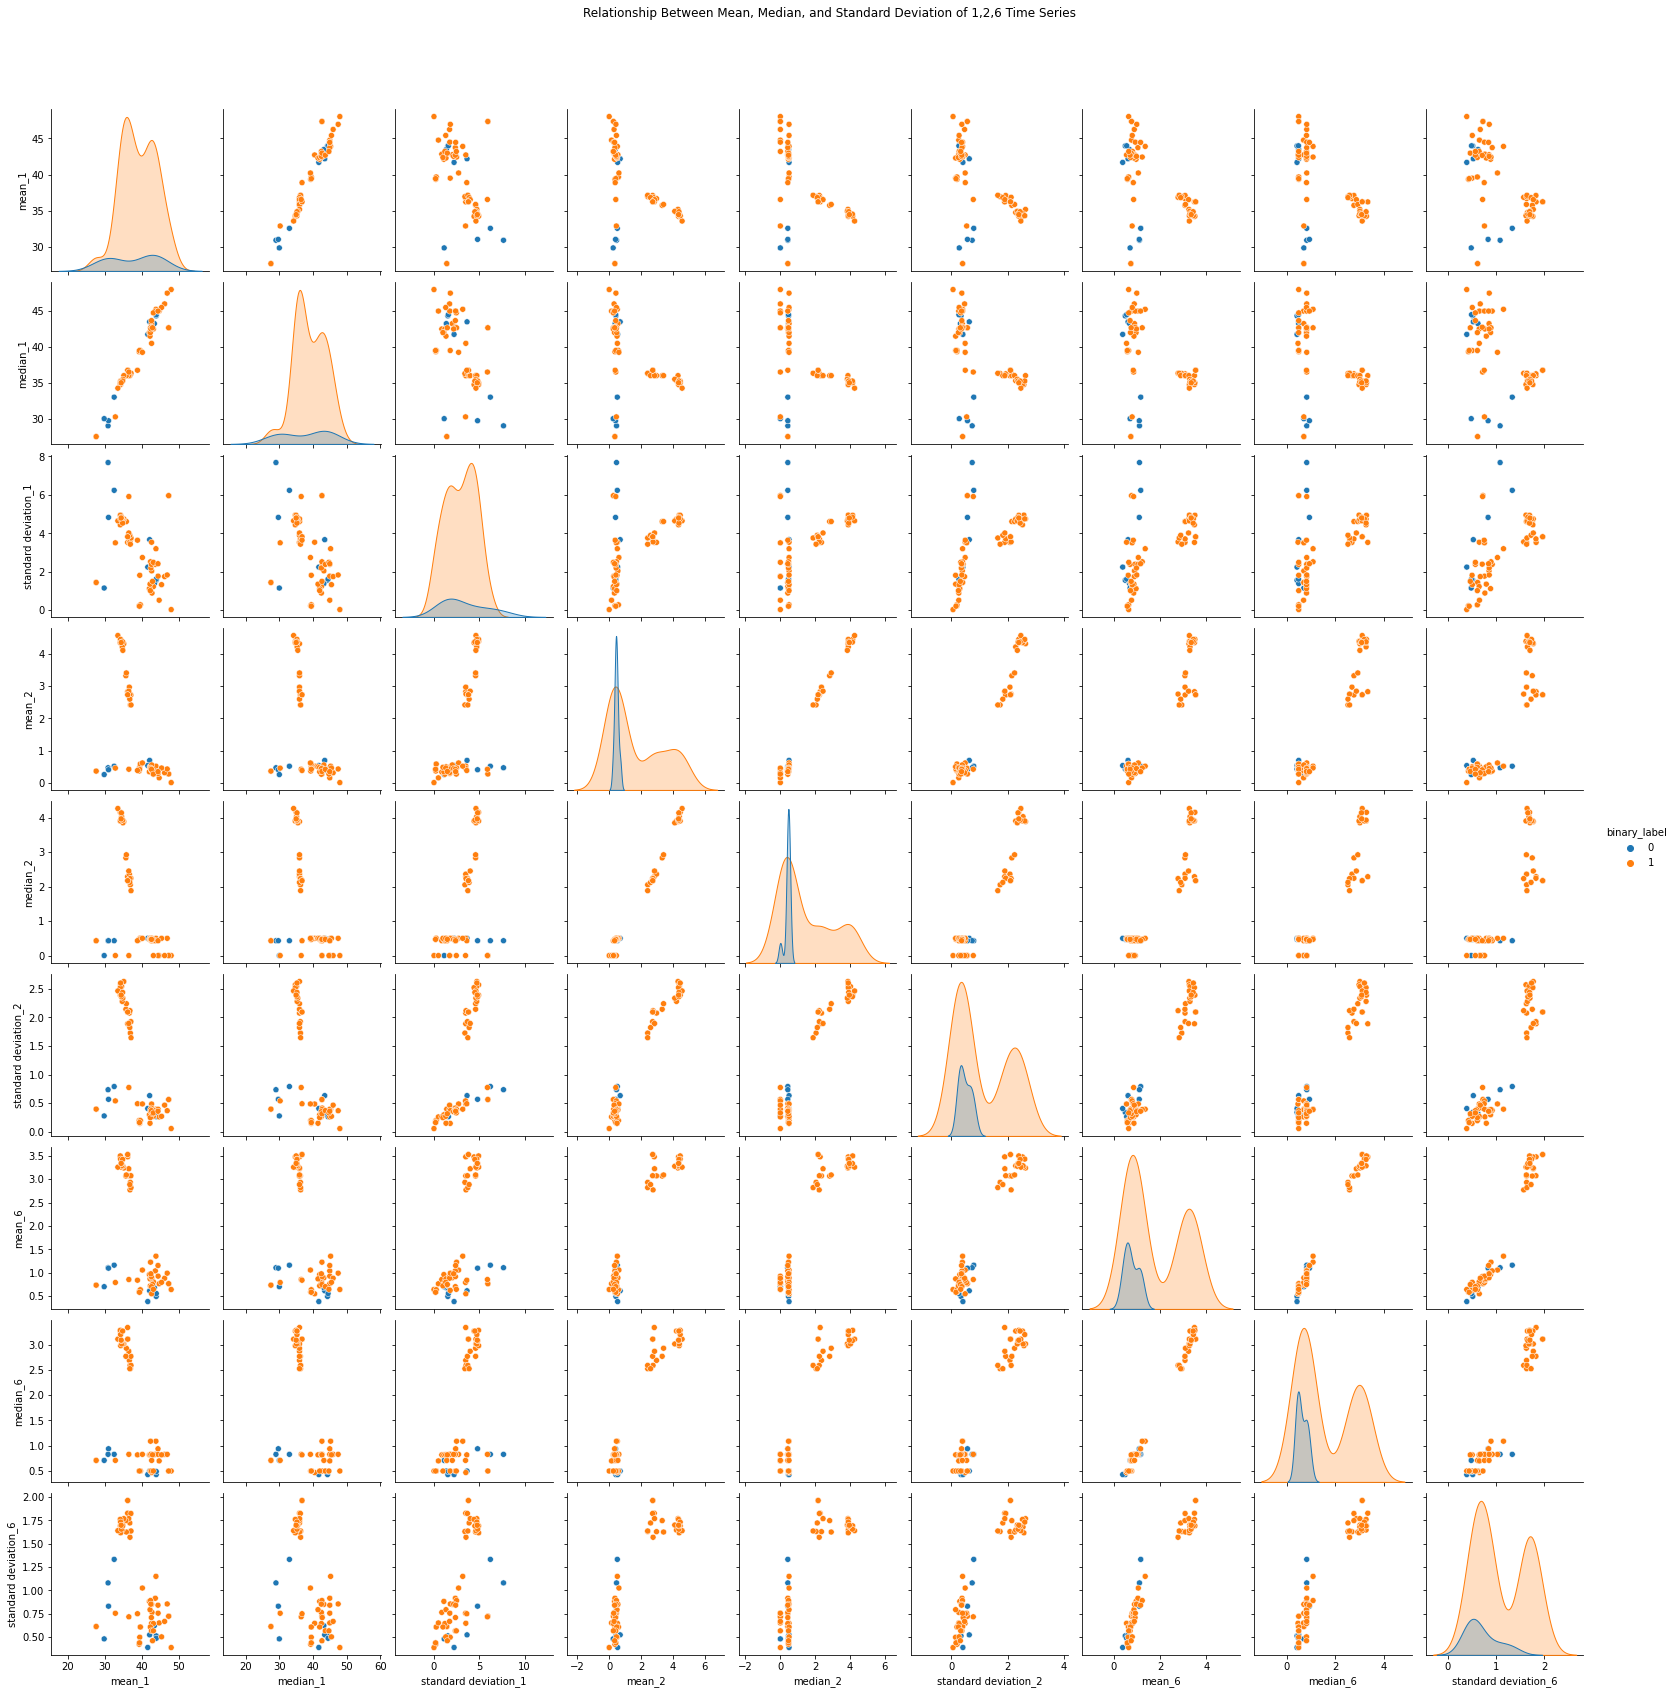

In [50]:
# since we are doing binary classification between bending and other activities
# we call bending as 0 and other activities as 1
df_df_train['binary_label'] = df_df_train['class_label'].apply(lambda x: 0 if x == "bending" else 1)
pairs = sns.pairplot(df_df_train,vars=['mean_1','median_1','standard deviation_1','mean_2','median_2',
                                       'standard deviation_2','mean_6','median_6','standard deviation_6'],hue='binary_label')
pairs.fig.suptitle('Relationship Between Mean, Median, and Standard Deviation of 1,2,6 Time Series',y=1.05)

##### 2(a) ii Breaking time series into parts

In [51]:
# break time series into 2 parts
# min
# create a list of all time series/csvs
all_paths=[bending1_path,bending2_path,cycling_path,lying_path,sitting_path,standing_path,walking_path]
# and there's one left path for bending2 which we will append later as it needs to skip 5 rows
all_paths = list(np.concatenate(all_paths).flat)
new_summary_table= [] #for storing the table after breaking each time series
#ppppp = ['../data/Arem/bending1/dataset1.csv','../data/Arem/bending1/dataset2.csv','../data/Arem/bending1/dataset3.csv']
def get_table(break_time):
    table=[]
    table2=[]
    arr_table=[]
    for path in all_paths:
        parts=[] # to store the summary table of each csv broken two parts
        a = pd.read_csv(path,skiprows=4)
        split_a_df = np.array_split(a,break_time)
        for part in split_a_df:
            part = part.iloc[::,1:7]
            part.reset_index(drop=True, inplace=True)
            parts.append(part)
        combine= pd.concat(parts,axis=1)
        keys = [i for i in range(0,len(combine.columns))]
        combine.columns =keys
        #bending1_combine.describe()[1::][::]# getting rid of count
        x= combine.describe()[1::][::]
        table.append(x)
        for f in table:
            f = f.reindex(['min','max','mean','50%','std','25%','75%'])
            f = f.rename({'50%':'median','25%':'first quartile','75%':'third quartile','std':'standard deviation'})
            f = f[2:5]
        table2.append(f)
    for f in table2:
        f =list(f.to_numpy().T.flatten())
        arr_table.append(f)
    new_summary_table =pd.DataFrame(data=arr_table)
    
    
    bd2_4 = pd.read_csv('../data/Arem/bending2/dataset4.csv',sep=' ',names=['# Columns: time',
                                                                'avg_rss12',
                                                                 'var_rss12','avg_rss13',
                                                                 'var_rss13','avg_rss23',
                                                                            'var_rss23'],skiprows=5,index_col=False)
    
    split_bd2 = np.array_split(bd2_4,break_time)
    parts_bd2=[]
    for part_bd2 in split_bd2:
        part_bd2 = part_bd2.iloc[::,1:7]
        part_bd2.reset_index(drop=True, inplace=True)
        parts_bd2.append(part_bd2)
    combines= pd.concat(parts_bd2,axis=1)
    keyss = [i for i in range(0,len(combines.columns))]
    combines.columns =keyss
    xs= combines.describe()[1::][::]
    k= xs.reindex(['min','max','mean','50%','std','25%','75%'])
    k = k.rename({'50%':'median','25%':'first quartile','75%':'third quartile','std':'standard deviation'})
    l =list(k[2:5].to_numpy().T.flatten())
    # inserting csv 10
    new_summary_table = pd.DataFrame(np.insert(new_summary_table.values, 9, l, axis=0))
    # labeling
    new_summary_table['class_label']='1'
    new_summary_table.iloc[0:13,-1]='bending'
    new_summary_table.iloc[13:28,-1]='cycling'
    new_summary_table.iloc[28:43,-1]='lying'
    new_summary_table.iloc[43:58,-1]='sitting'
    new_summary_table.iloc[58:73,-1]='standing'
    new_summary_table.iloc[73:88,-1]='walking'
    return new_summary_table
break_2 = get_table(2)
break_2

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,class_label
0,40.946958,41.250,1.102963,0.375667,0.470,0.328089,17.672583,18.00,4.063161,0.588625,...,1.076458,0.82,1.039480,34.118375,35.415,2.838110,0.552167,0.430,0.510494,bending
1,42.643292,42.500,0.641849,0.355000,0.470,0.258298,20.369667,21.00,2.693040,0.643625,...,1.109250,0.83,1.127568,32.301708,32.000,2.283931,0.533583,0.430,0.575061,bending
2,44.057167,44.500,1.556971,0.381042,0.470,0.329540,23.096792,24.00,2.410625,0.493458,...,0.501167,0.43,0.599386,34.883375,36.000,2.298693,0.388333,0.000,0.478528,bending
3,43.278875,45.000,3.473355,0.673292,0.485,0.634285,23.141250,23.75,3.123258,0.808042,...,1.171792,0.87,1.079233,30.965708,30.415,3.760118,0.586083,0.470,0.491873,bending
4,41.621208,42.330,3.118644,0.623083,0.500,0.489595,19.081458,19.50,5.102939,1.115083,...,0.568667,0.47,0.456292,29.635833,29.750,2.062647,0.347500,0.430,0.363144,bending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,33.334500,34.000,4.874433,4.408083,4.195,2.196206,15.445333,15.33,2.901096,3.271417,...,3.183042,3.08,1.655159,15.755958,15.875,3.232396,3.290292,3.155,1.646023,walking
84,34.036750,34.415,4.872880,4.778292,4.030,2.762730,15.177083,15.25,2.755151,3.394083,...,3.160375,2.95,1.479333,15.520375,15.750,3.162332,3.321417,3.155,1.758379,walking
85,34.033875,35.000,4.758757,4.574625,4.470,2.391804,15.340417,15.25,2.809516,3.025417,...,3.031958,2.87,1.644967,15.218417,15.000,2.660153,3.432208,3.255,1.691050,walking
86,34.920792,35.330,4.272282,4.177958,3.865,2.341763,15.515875,15.50,2.844735,3.235125,...,3.176250,2.95,1.483199,15.939417,16.000,3.163566,3.418667,3.350,1.598536,walking


## !!!!!!
#### For every three column names, the first one is mean, then median, then standard deviation.
#### For instance, 0 is mean1_1 1 is median1_1 and 2 is stand deviation1_1. 
#### 6 is mean3_1, 7 is median3_1, 8 is standard_deviation3_1
#### Not encoding the column numbers to names since numbers are easier to manipulate with, and the question does not ask for the name of the selected features as we are only using them to train and test models.

In [52]:
#select the testing and training part  
test_part_1_b = break_2.iloc[0:2,0::] # the first two csv files of bending1
test_part_2_b = break_2.iloc[7:9,0::] # the first two csv files of bending2
test_part_3_b = break_2.iloc[13:16,0::] # first three of cycling
test_part_4_b = break_2.iloc[28:31,0::]
test_part_5_b = break_2.iloc[43:46,0::]
test_part_6_b= break_2.iloc[58:61,0::]
test_part_7_b= break_2.iloc[73:76,0::]
break_2_test = pd.concat([test_part_1_b,test_part_2_b,test_part_3_b,test_part_4_b,
                       test_part_5_b,test_part_6_b,test_part_7_b],ignore_index = False)
break_2_test

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,class_label
0,40.946958,41.250,1.102963,0.375667,0.470,0.328089,17.672583,18.000,4.063161,0.588625,...,1.076458,0.820,1.039480,34.118375,35.415,2.838110,0.552167,0.430,0.510494,bending
1,42.643292,42.500,0.641849,0.355000,0.470,0.258298,20.369667,21.000,2.693040,0.643625,...,1.109250,0.830,1.127568,32.301708,32.000,2.283931,0.533583,0.430,0.575061,bending
7,24.675375,24.330,4.856867,0.774500,0.430,1.085015,18.648542,18.585,3.636118,0.615458,...,0.858083,0.500,1.040881,20.528208,20.670,2.392270,0.936917,0.810,0.818833,bending
8,29.071583,29.500,1.133954,0.231208,0.000,0.265205,19.427625,19.875,2.488367,0.576042,...,0.983792,0.710,1.011267,16.720833,16.500,6.601229,1.473250,1.220,1.238675,bending
13,36.954208,36.000,3.772836,2.392667,1.920,1.523329,17.121542,17.330,3.603285,2.995083,...,2.826125,2.570,1.576561,19.643917,20.125,2.710635,2.838083,2.450,1.890755,cycling
14,37.592250,37.000,3.127179,2.111625,1.715,1.574180,16.200708,16.500,3.099330,3.172000,...,2.895750,2.760,1.624815,19.774333,20.290,2.642945,2.746417,2.335,1.825523,cycling
15,37.740667,36.710,3.536378,2.147167,1.500,1.993348,16.472083,16.790,3.963206,2.879458,...,3.081917,2.955,1.625823,16.621667,16.875,3.583310,3.348542,3.270,1.871377,cycling
28,27.368417,27.000,1.295725,0.308042,0.000,0.421739,7.180500,7.250,3.054192,0.888542,...,0.853500,0.765,0.855122,6.472000,5.585,4.223762,0.801083,0.820,0.603417,lying
29,40.361042,48.000,9.125029,0.194583,0.000,0.467226,6.908417,6.750,2.265042,0.712250,...,0.455958,0.430,0.513185,2.168750,2.000,1.255456,0.524500,0.470,0.590831,lying
30,48.001042,48.000,0.016137,0.001792,0.000,0.027756,6.038958,6.000,2.115595,0.447208,...,0.347417,0.430,0.409577,10.124792,10.000,0.890673,0.612333,0.500,0.330623,lying


In [53]:
break_2_train = break_2.loc[break_2.index.difference(break_2_test.index)]
break_2_train

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,class_label
2,44.057167,44.500,1.556971,0.381042,0.470,0.329540,23.096792,24.000,2.410625,0.493458,...,0.501167,0.43,0.599386,34.883375,36.000,2.298693,0.388333,0.000,0.478528,bending
3,43.278875,45.000,3.473355,0.673292,0.485,0.634285,23.141250,23.750,3.123258,0.808042,...,1.171792,0.87,1.079233,30.965708,30.415,3.760118,0.586083,0.470,0.491873,bending
4,41.621208,42.330,3.118644,0.623083,0.500,0.489595,19.081458,19.500,5.102939,1.115083,...,0.568667,0.47,0.456292,29.635833,29.750,2.062647,0.347500,0.430,0.363144,bending
5,44.117042,45.000,1.359836,0.250042,0.000,0.314099,17.744167,18.000,4.010149,1.123000,...,0.575708,0.43,0.730490,22.850875,23.250,1.881721,0.543875,0.500,0.473445,bending
6,43.486208,43.710,1.281976,0.378667,0.470,0.284434,16.397250,16.875,3.469237,0.662958,...,0.669750,0.47,0.744611,21.882042,21.750,1.929494,0.585750,0.500,0.487918,bending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,33.334500,34.000,4.874433,4.408083,4.195,2.196206,15.445333,15.330,2.901096,3.271417,...,3.183042,3.08,1.655159,15.755958,15.875,3.232396,3.290292,3.155,1.646023,walking
84,34.036750,34.415,4.872880,4.778292,4.030,2.762730,15.177083,15.250,2.755151,3.394083,...,3.160375,2.95,1.479333,15.520375,15.750,3.162332,3.321417,3.155,1.758379,walking
85,34.033875,35.000,4.758757,4.574625,4.470,2.391804,15.340417,15.250,2.809516,3.025417,...,3.031958,2.87,1.644967,15.218417,15.000,2.660153,3.432208,3.255,1.691050,walking
86,34.920792,35.330,4.272282,4.177958,3.865,2.341763,15.515875,15.500,2.844735,3.235125,...,3.176250,2.95,1.483199,15.939417,16.000,3.163566,3.418667,3.350,1.598536,walking


Text(0.5, 1.05, 'Relationship Between Mean, Median, and Standard Deviation of 1,2,6 Time Series with breaking into 2')

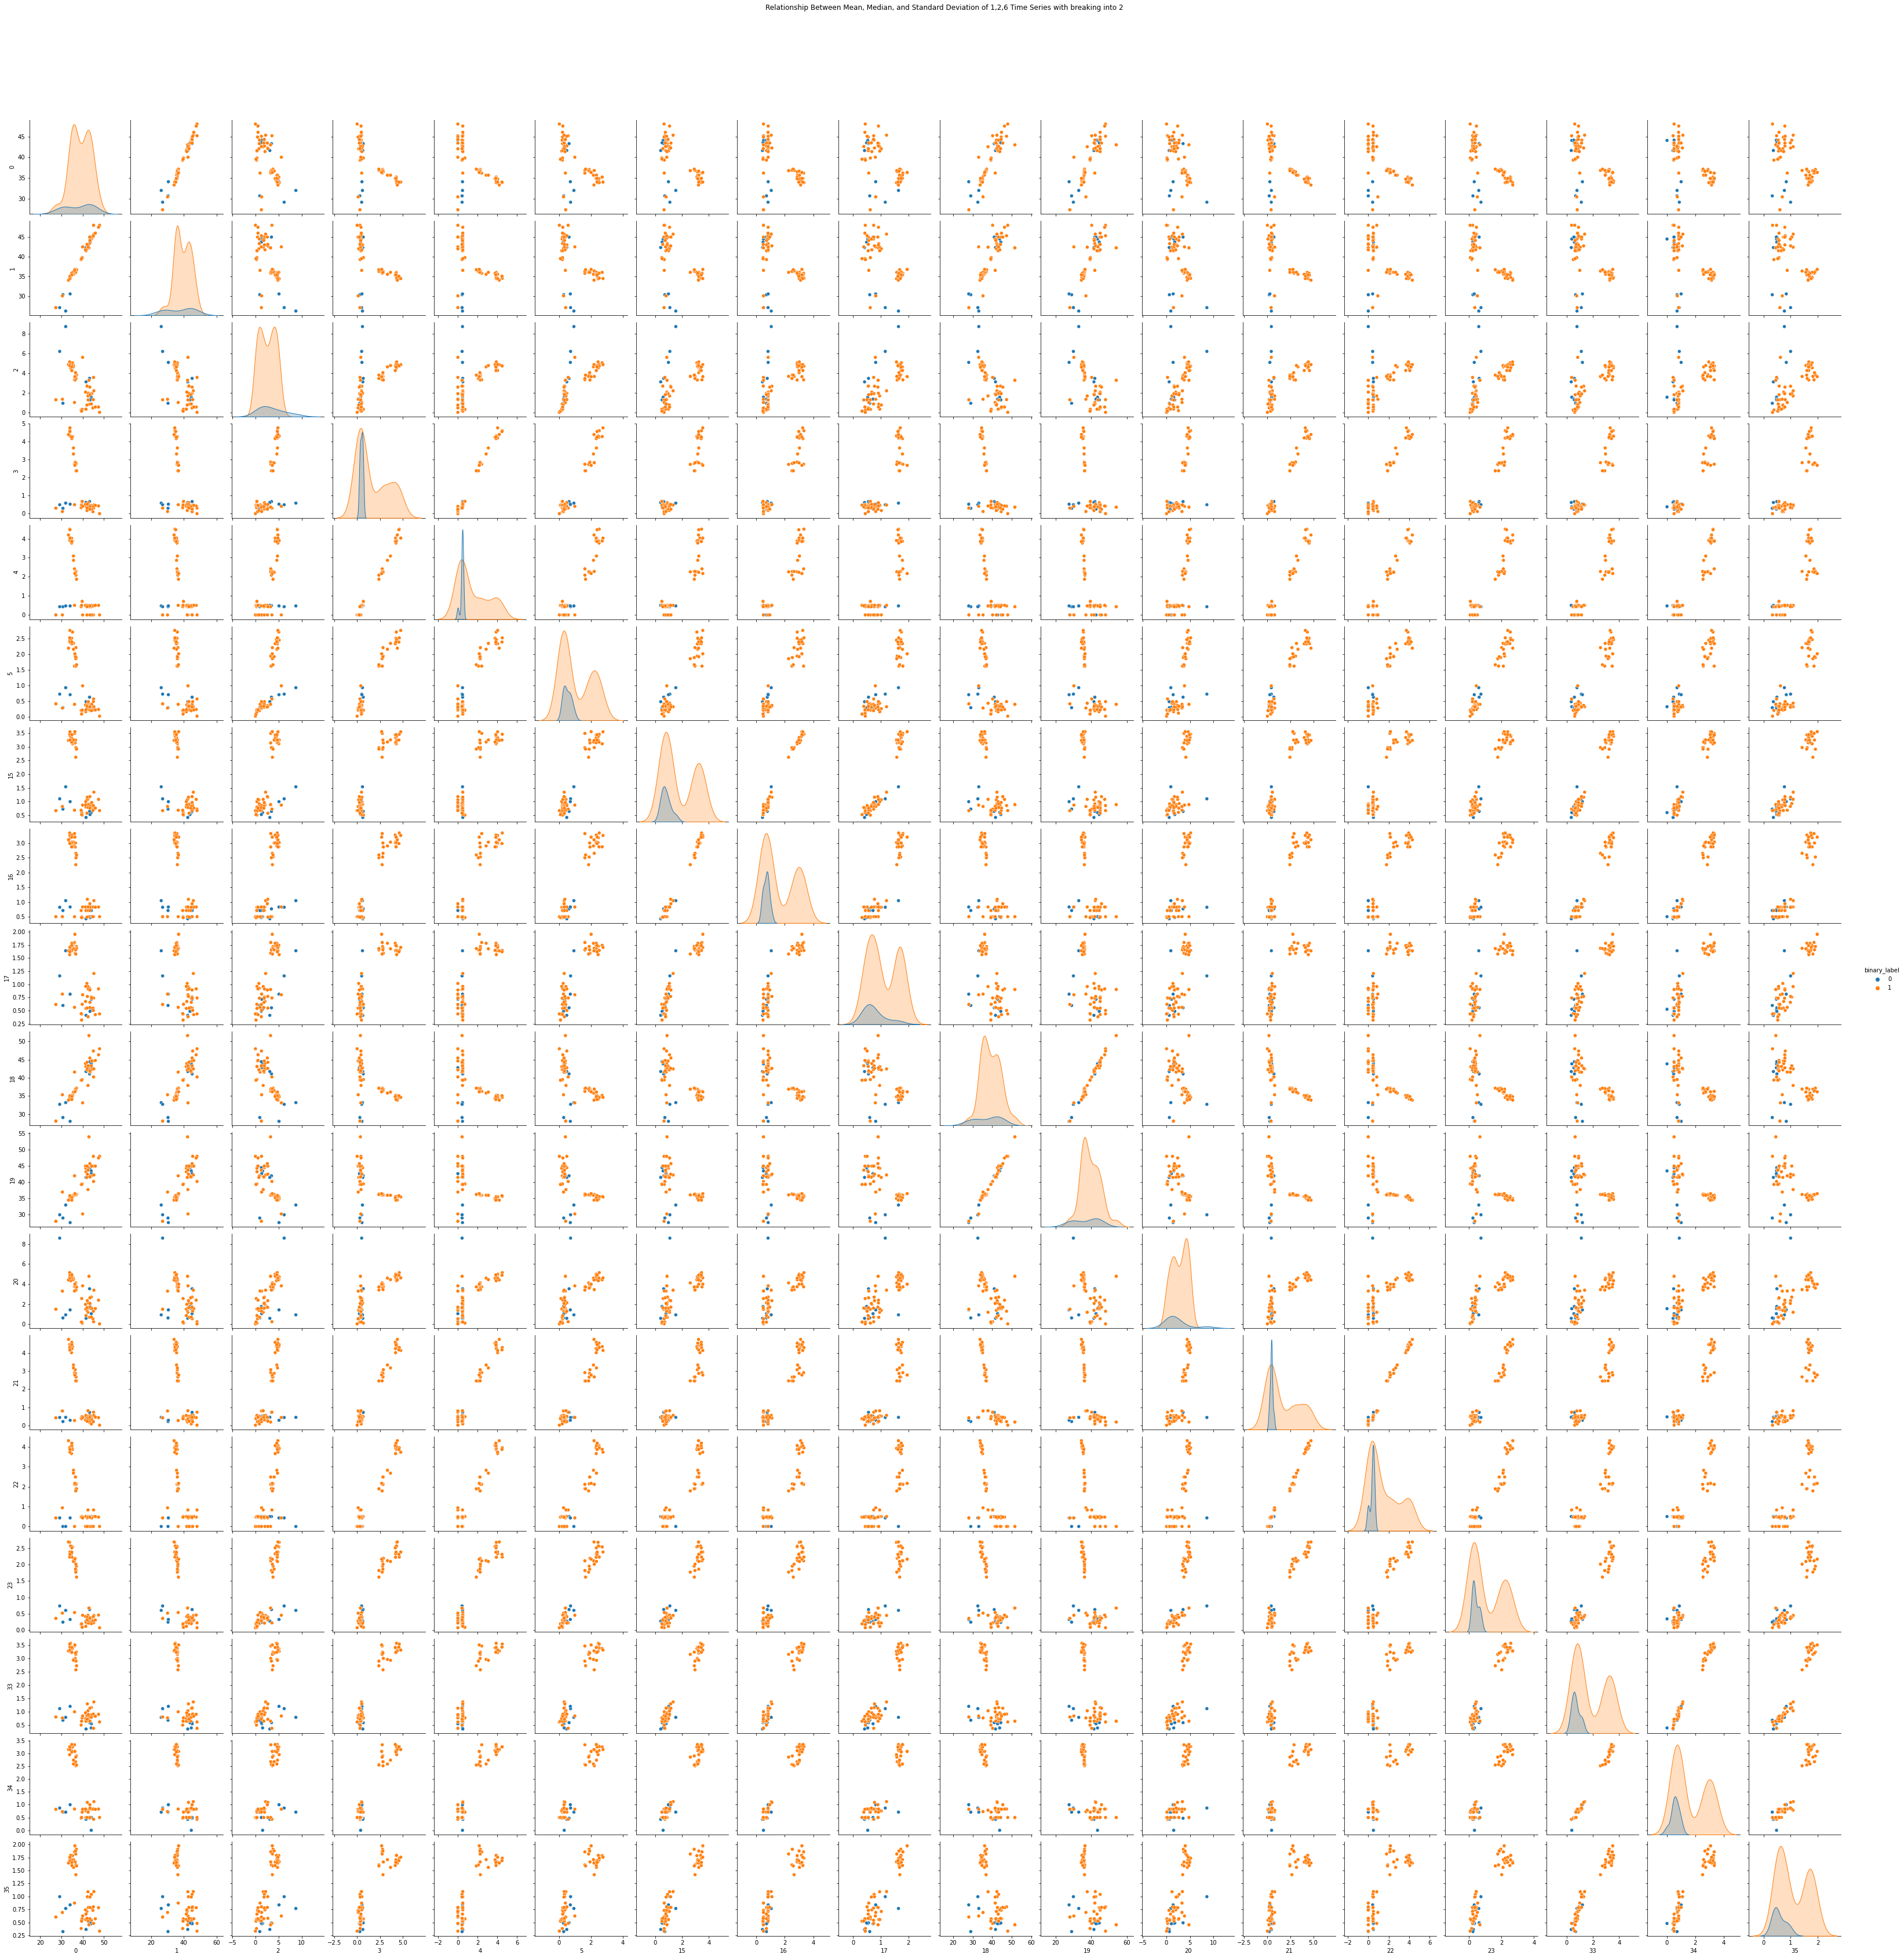

In [54]:
break_2_train['binary_label'] = break_2_train['class_label'].apply(lambda x: 0 if x == "bending" else 1)
#break_2_train.drop('class_label',axis=1)
pairs_b = sns.pairplot(break_2_train,vars=[0,1,2,3,4,5,15,16,17,18,19,20,21,22,23,33,34,35],hue='binary_label')
# finding mean median standard deviation by indices
pairs_b.fig.suptitle('Relationship Between Mean, Median, and Standard Deviation of 1,2,6 Time Series with breaking into 2',y=1.05)


I do not see any considerable difference except that the figure becomes 18 by 18, not 9 by 9.

##### 2(a) iii Perform feature selection with recursive feature elimination, a backward selection algorithm

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score

In [56]:
# define a function that split train and test csv of the summary table
def get_train(t):
    test_t_1 = t.iloc[0:2,0::] # the first two csv files of bending1
    test_t_2 = t.iloc[7:9,0::] # the first two csv files of bending2
    test_t_3 = t.iloc[13:16,0::] # first three of cycling
    test_t_4 = t.iloc[28:31,0::]
    test_t_5 = t.iloc[43:46,0::]
    test_t_6 = t.iloc[58:61,0::]
    test_t_7 = t.iloc[73:76,0::]
    test_t_data = pd.concat([test_t_1,test_t_2,test_t_3,test_t_4,
                             test_t_5,test_t_6,test_t_7],ignore_index = False)
    train_t_data = t.loc[t.index.difference(test_t_data.index)]
    return train_t_data

In [60]:
break_table=[]# to store the new generated table for every size of breaking of time series
cross_validation_score=[] # to store the cross validation score
number_feature =[]
feature_names=[]
for times in range(1,21):
    #feature_sub=[]
    x = get_table(times) # use the function I create above
    x['binary_label']=x['class_label'].apply(lambda x: 0 if x == "bending" else 1)
    x=x.drop('class_label',axis=1)
    x.columns = x.columns.astype(str)
    X =get_train(x) # we need to select the training set right? Yes
    #break_table.append(X)
    model = LogisticRegression(max_iter=1000)
    rfecv = RFECV(model,cv=5)
    rfecv = rfecv.fit(X.iloc[0::,0:-1],X.iloc[::,-1]) # splitting the X and y here of each training dataset
    number_feature.append(rfecv.n_features_)
    #print(rfecv.support_)
    #print(rfecv.ranking_)
    #print(rfecv.n_features_)
    accuracy = cross_val_score(rfecv, X.iloc[0::,0:-1], X.iloc[::,-1], scoring='accuracy', cv = 5)
    mean_accuracy = accuracy.mean()# get the mean of accuracy score
    # reference: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85
    cross_validation_score.append(mean_accuracy)
    #feature_sub.append(rfecv.feature_names_in_)
    #feature_names.append(feature_sub)
print(cross_validation_score)
print(number_feature)

[0.9274725274725275, 0.9417582417582417, 0.9560439560439562, 0.9131868131868133, 0.9274725274725275, 0.9571428571428571, 0.9131868131868132, 0.9274725274725275, 0.9274725274725275, 0.9428571428571428, 0.9417582417582417, 0.9703296703296704, 0.9714285714285715, 0.9560439560439562, 0.9417582417582417, 0.9571428571428573, 0.9560439560439562, 0.9560439560439562, 0.9714285714285715, 0.9714285714285715]
[6, 5, 1, 11, 1, 8, 1, 17, 8, 9, 21, 1, 5, 1, 24, 10, 1, 1, 3, 1]


We can find the best (l,p) pair by just counting. When l is 19 and 20, the mean accuracy score is the highest 0.9714. We can just pick one of the pairs. And I pick (l,p) = (19,3)

In [63]:
x = get_table(19) # use the function I create above
x['binary_label']=x['class_label'].apply(lambda x: 0 if x == "bending" else 1)
x=x.drop('class_label',axis=1)
x.columns = x.columns.astype(str)
X =get_train(x) # we need to select the training set right? Yes
model = LogisticRegression(max_iter=1000)
rfecv = RFECV(model,cv=5)
rfecv = rfecv.fit(X.iloc[0::,0:-1],X.iloc[::,-1])
accuracy = cross_val_score(rfecv, X.iloc[0::,0:-1], X.iloc[::,-1], scoring='accuracy', cv = 5)
mean_accuracy = accuracy.mean()
print(rfecv.ranking_)
print(rfecv.support_)
print(rfecv.n_features_)
print(mean_accuracy)
print(type(rfecv.ranking_))

[218 133 337 205 266 282 153 336 247 287 294 340  17  22 166 167 212 310
 243 275 190 232 276 256 293 134 141 206 103 332   3   5 329  83 155 279
 269 312  33 173 260 249 315 305  99 296 142 328   1   1  73  77  41 306
 324 219 322 220 253 289 135 160 239 181 165 325  11  19 143 245 215 339
 338 202 216 136 175 204 223 102  87 250 257 335   9   6 157 200 230 290
 170 225  26  65 105 201 163 192 198 259 168 318  14   8 284  35  49 241
 148 106 152 169 263 172   2   7 304 291 278 331 221 238 199  76  98 262
 288 334 261  95 111 272  97  72  86 131 178 265 327 274 171 104  67 298
 125 109  28  63 110 227 326 273  92 159 127 303 323 330 317 146 233 246
 151 270  93 121 186 234 316  54 319 208 285 302 191 126 311 179 228 268
  25  15  24  89 117 237  16 226 214 176 187 301 116  84 231 210 236 297
  39  31 108  64 129 195 182 119 185  71  82 283  60  42 145 100 124 258
  78  62  18  48  74 180  69  51 114  75  59 280 150 184  91 156 197 254
  46  58  23  43 128 138  44  37  30  40  56 144 30

In [64]:
feature_indices = np.where(rfecv.ranking_ == 1)[0]
feature_indices

array([ 48,  49, 300])

The right way to perform cross validation in this problem is to use it on each every training data set predictors. The wrong way is to only cross validation on the selected predictors.

In [82]:
# so now refitting the model with pair = (19,3)
from sklearn import metrics
# select the 3 features columns
X_train_features = pd.concat([X.iloc[0::,48:50],X.iloc[0::,300:301]],axis=1)
y_train_binary = X.iloc[::,-1] 
new_model_2 =LogisticRegression(max_iter=1000)
rfecv2 = RFECV(new_model_2,cv=5)
rfecv2 = rfecv2.fit(X_train_features,y_train_binary)

##### 2(a) iv Report the confusion matrix, ROC, AUC, and p-val of parameters of the logistic regression

In [80]:
# confusion matrix
y_pred = rfecv2.predict(X_train_features) # still on training data
cnf_matrix = metrics.confusion_matrix(y_train_binary, y_pred)
cnf_matrix

array([[ 9,  0],
       [ 0, 60]])

In [84]:
# p-values
import statsmodels.api as sm
logit_model=sm.Logit(y_train_binary,X_train_features)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.469283
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           binary_label   No. Observations:                   69
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            2
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                 -0.2120
Time:                        23:47:59   Log-Likelihood:                -32.381
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
48            -0.3709      0.641     -0.579      0.563      -1.627       0.885
49             0.1999      0.

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


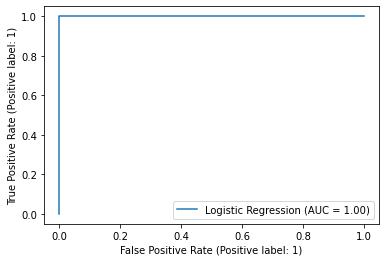

In [86]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfecv2, X_train_features, y_train_binary, name = 'Logistic Regression')

##### 2(a) v Find the accuracy using the test data

In [90]:
# get the test set 
X_test2 = x.loc[x.index.difference(X.index)]
X_test_features = pd.concat([X_test2.iloc[0::,48:50],X_test2.iloc[0::,300:301]],axis=1)
y_test_binary = X_test2.iloc[::,-1] 
y_pred_2 = rfecv2.predict(X_test_features) # we have trained this model already
accuracy_2 = cross_val_score(rfecv2, X_test_features, y_test_binary, scoring='accuracy', cv = 5)
mean_accuracy_2 = accuracy.mean()
print(mean_accuracy_2)

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is

0.9714285714285715


/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


##### 2(a) vi Are classes seem to be well-separated to cause instability in calculating logistic regression parameters?

It does seem to have some instability as the slope is quite steep.

In [92]:
cnf_matrix2 = metrics.confusion_matrix(y_test_binary, y_pred_2)
cnf_matrix2

array([[ 3,  1],
       [ 1, 14]])

##### 2(a) vii case control sampling to solve imblanced classes. ROC, AUC, confusion matrix.

From the confusion matrix above, it seems that classes are imbalanced. As only about 20% data is in the bending class. So there are bias that the model tends to predict the majority class. Hence, we will apply Oversampling called SMOTE here to resample the minority class proportion following the majority class proportion.
Reference:
https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5

 Have to find the l, p pair again since we do case control sampling.

In [145]:
from imblearn.over_sampling import SMOTE
cross_validation_score_=[] # to store the cross validation score
number_feature_ =[]
feature_names_=[]
for times in range(1,21):
    #feature_sub=[]
    #X.iloc[0::,0:-1],X.iloc[::,-1]
    x_ = get_table(times) # use the function I create above
    x_['binary_label']=x_['class_label'].apply(lambda x: 0 if x == "bending" else 1)
    x_=x_.drop('class_label',axis=1)
    x_.columns = x_.columns.astype(str)
    X_ =get_train(x_) # we need to select the training set right? Yes
    smote = SMOTE(random_state = 101)
    SM_X, SM_y= smote.fit_resample(X_.iloc[0::,0:-1], X_.iloc[::,-1])
    model5 = LogisticRegression(max_iter=1000)
    rfecv5 = RFECV(model5,cv=5)
    rfecv5 = rfecv5.fit(SM_X,SM_y) # splitting the X and y here of each training dataset
    number_feature_.append(rfecv5.n_features_)
    accuracy_ = cross_val_score(rfecv5, SM_X, SM_y, scoring='accuracy', cv = 5)
    mean_accuracy_ = accuracy_.mean()# get the mean of accuracy score
    # reference: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85
    cross_validation_score_.append(mean_accuracy_)
    #feature_sub.append(rfecv.feature_names_in_)
    #feature_names.append(feature_sub)
print(cross_validation_score_)
print(number_feature_)

[0.9666666666666668, 0.975, 0.9833333333333334, 0.9666666666666668, 0.9666666666666668, 0.9916666666666668, 0.9666666666666668, 0.9833333333333334, 0.9833333333333334, 0.9916666666666668, 0.9833333333333334, 1.0, 1.0, 1.0, 0.9833333333333334, 0.9916666666666668, 0.9916666666666668, 1.0, 1.0, 1.0]
[6, 6, 6, 2, 11, 6, 7, 4, 7, 9, 12, 3, 3, 3, 11, 5, 5, 3, 3, 3]


We see break time 12,13,14,18,19,20 for sampling control all got a score of 1. I will pick l=12 with 3 corresponding features as the second list shows.

In [150]:
x_re = get_table(12) # use the function I create above
x_re['binary_label']=x_re['class_label'].apply(lambda x: 0 if x == "bending" else 1)
x_re=x_re.drop('class_label',axis=1)
x_re.columns = x_re.columns.astype(str)
X_re =get_train(x_re) # we need to select the training set right? Yes # capital letter X
smote = SMOTE(random_state = 101)
SM_X_re, SM_y_re= smote.fit_resample(X_re.iloc[0::,0:-1], X_re.iloc[::,-1])
model5x = LogisticRegression(max_iter=1000)
rfecv5x = RFECV(model5x,cv=5)
rfecv5x = rfecv5x.fit(SM_X_re,SM_y_re) # splitting the X and y here of each training dataset
print(rfecv5x.ranking_)
print(rfecv5x.n_features_)

[132 160 210 117 146 168  67   2  98 172 150 208   3   4 115 110 120 195
 174 198  57 127 184 151 179 186  83 154  70 209   1   1 119  31  27 192
 201 175 109 124 170 133 104  68  90 159 153 211   8  13  76 162 138 207
 107 176  23  47  74 111 125 200  61 155 126 188   9   6 178  22  24 129
  73  81 181  94 139 137  20  56 165 144 156 193 189 205 203  72  60 171
  97  80  37  59  88 152 167 199  92 112 100 191 206 202 194  99 135 157
  40   5  14  62  87 130   7 212 131 122 142 196  66  41 116 121 140 173
  33  15  25  39  78 114  58  51  79  50  49 145  52  45  96  77  82 148
  46  28  17  19  43 113  38  26  95  34  42 149 161 177  89  30  84 141
  18  11 182  48  69 169 102 190  75  64  63 187 197 214 213  55  91 164
 105  53  16 103 180 143  29  12  44  86 108 183   1  10  93  71 101 147
 128 106 118  85 134 136 204 123 158  35  36 163  32  21 185  65  54 166]
3


In [155]:
feature_indices_re = np.where(rfecv5x.ranking_ == 1)[0]
feature_indices_re

array([ 30,  31, 192])

In [163]:
X_train_features_re = pd.concat([SM_X_re.iloc[0::,30:32],SM_X_re.iloc[0::,192:193]],axis=1)
y_train_binary_re = SM_y_re # we have resampled already and it only contains one column
model_re =LogisticRegression(max_iter=1000)
rfecv_re = RFECV(model_re,cv=5)
rfecv_re = rfecv_re.fit(X_train_features_re,y_train_binary_re)
y_pred_re = rfecv_re.predict(X_train_features_re) # still on training data
cnf_matrix_re = metrics.confusion_matrix(y_train_binary_re, y_pred_re)
cnf_matrix_re

array([[60,  0],
       [ 0, 60]])

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


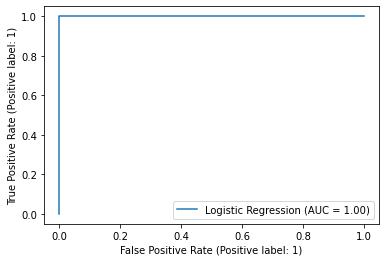

In [164]:
plot_roc_curve(rfecv_re, X_train_features_re, y_train_binary_re, name = 'Logistic Regression')

Below are the ROC AUC Confusion Matrix and Accuracy for the testing data. And we do not resample the testing dataset.

We will use the same model again but just with testing data.

In [166]:
X_test_re = x_re.loc[x_re.index.difference(X_re.index)]
X_test_features_re = pd.concat([X_test_re.iloc[0::,30:32],X_test_re.iloc[0::,192:193]],axis=1)
y_test_binary_re = X_test_re.iloc[::,-1]

In [171]:
y_pred_re_t = rfecv_re.predict(X_test_features_re)
cnf_matrix_re_t = metrics.confusion_matrix(y_test_binary_re, y_pred_re_t)
cnf_matrix_re_t
# the result on test data is slightly better for case control resampling than without case control

array([[ 3,  1],
       [ 0, 15]])

In [172]:
accuracy_re_t = cross_val_score(rfecv_re, X_test_features_re, y_test_binary_re, scoring='accuracy', cv = 5)
mean_accuracy_re_t = accuracy_re_t.mean()
print(mean_accuracy_re_t)

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is

0.9


/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


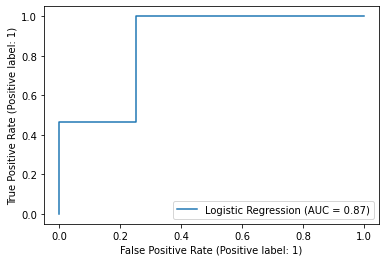

In [170]:
plot_roc_curve(rfecv_re,X_test_features_re, y_test_binary_re, name = 'Logistic Regression')

##### (b) i Binary Classification using L1-penalized logistic regression

In [130]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, LogisticRegressionCV
from sklearn.feature_selection import SelectFromModel
# we need to normalize the faetures first
norm = MinMaxScaler() # ensure the values are between 0 and 1
# break time series like in (a)iii
#number_feature_l1= []
budget_list=[]
score_l1 =[]
cross_validation_score_4=[]
#support_list=[]
for times in range(1,21):
    xx = get_table(times) # use the function I create above
    xx['binary_label']=xx['class_label'].apply(lambda x: 0 if x == "bending" else 1)
    xx=xx.drop('class_label',axis=1)
    xx.columns = xx.columns.astype(str)
    x_norm = norm.fit_transform(xx)
    x_norm=pd.DataFrame(x_norm)
    x_norm.columns = x_norm.columns.astype(str)
    XX =get_train(x_norm) # we need to select the training set right? Yes
    model4 = LogisticRegressionCV(cv=5,penalty='l1',solver='liblinear',max_iter=1000)
    model4.fit(XX.iloc[0::,0:-1],XX.iloc[::,-1])# splitting the X and y here of each training dataset
    score_l1.append(model4.score(XX.iloc[0::,0:-1],XX.iloc[::,-1])) # model score
    budget_list.append(model4.C_) # get budget or lambda value
    accuracy4 = cross_val_score(model4, XX.iloc[0::,0:-1], XX.iloc[::,-1], scoring='accuracy', cv = 5)
    mean_accuracy4 = accuracy4.mean()# get the mean of accuracy score
    # reference: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85
    cross_validation_score_4.append(mean_accuracy4)
print(budget_list)
print(score_l1)
print(cross_validation_score_4)


[array([2.7825594]), array([21.5443469]), array([2.7825594]), array([2.7825594]), array([2.7825594]), array([2.7825594]), array([21.5443469]), array([2.7825594]), array([166.81005372]), array([166.81005372]), array([21.5443469]), array([21.5443469]), array([2.7825594]), array([21.5443469]), array([21.5443469]), array([166.81005372]), array([21.5443469]), array([21.5443469]), array([166.81005372]), array([21.5443469])]
[0.9420289855072463, 1.0, 0.9855072463768116, 0.9855072463768116, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9131868131868132, 0.9428571428571428, 0.9142857142857143, 0.9285714285714285, 0.8846153846153847, 0.9428571428571428, 0.8989010989010989, 0.8989010989010989, 0.8989010989010989, 0.9142857142857143, 0.9428571428571428, 0.8989010989010989, 0.9142857142857143, 0.9131868131868133, 0.8989010989010989, 0.8989010989010989, 0.9274725274725275, 0.9428571428571428, 0.8846153846153847, 0.9142857142857143]


so by looking at the score list, we know that when l=2, the score is the highest (0.942857) and its corresponding C is 21.5443469. 

In [143]:
# now we just use l=2 to get the L1 penalized regression model and find confusion matrix
# find ROC AUC
xl1 = get_table(2) # use the function I create above
xl1['binary_label']=xl1['class_label'].apply(lambda x: 0 if x == "bending" else 1)
xl1=xl1.drop('class_label',axis=1)
xl1.columns = xl1.columns.astype(str)
x_norm_l1 = norm.fit_transform(xl1)
x_norm_l1 = pd.DataFrame(x_norm_l1)
x_norm_l1.columns = x_norm_l1.columns.astype(str)
Xl1 =get_train(x_norm_l1) # we need to select the training set right? Yes
model6 = LogisticRegressionCV(cv=5,penalty='l1',solver='liblinear',max_iter=1000)
model6.fit(Xl1.iloc[0::,0:-1],Xl1.iloc[::,-1])# splitting the X and y here of each training dataset
accuracy6 = cross_val_score(model6, Xl1.iloc[0::,0:-1], Xl1.iloc[::,-1], scoring='accuracy', cv = 5)
mean_accuracy6 = accuracy6.mean()# get the mean of accuracy score
# reference: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85
print('Model score is ',model6.score(Xl1.iloc[0::,0:-1],Xl1.iloc[::,-1]))
print('Accuracy score is ',mean_accuracy6)
print('Coefficients of features are ',model6.coef_)
print('C or the budget is ',model6.C_)

Model score is  1.0
Accuracy score is  0.9428571428571428
Coefficients of features are  [[  0.           6.00106637   0.           0.           0.
    0.           0.           0.26796858  -7.13178034   0.
    0.           0.         -23.72753022   0.          -1.73756458
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           2.54830869   0.           0.           0.
    0.           0.           3.03658689   0.           0.
    6.44572945]]
C or the budget is  [21.5443469]


In [135]:
# get the column index of features that have a coefficient so that we can refit the model
feature_indices_l1 = np.where(model6.coef_[0] != 0)[0]
feature_indices_l1

array([ 1,  7,  8, 12, 14, 26, 32, 35])

In [144]:
X_selected_features_l1 = pd.concat([Xl1.iloc[0::,1:2],Xl1.iloc[0::,7:9],Xl1.iloc[0::,12:13],
                                   Xl1.iloc[0::,14:15],Xl1.iloc[0::,26:27],Xl1.iloc[0::,32:33],
                                   Xl1.iloc[0::,35:36]],axis=1)
y_selected_l1_binary = Xl1.iloc[::,-1]
# already regularized
# now we can buid a model
model7 = LogisticRegressionCV(cv=5,penalty='l1',solver='liblinear',max_iter=1000)
model7.fit(X_selected_features_l1,y_selected_l1_binary)
y_pred_7 = model7.predict(X_selected_features_l1)
accuracy_7 = cross_val_score(model7, X_selected_features_l1, y_selected_l1_binary, scoring='accuracy', cv = 5)
mean_accuracy_7 = accuracy_7.mean()
print('The accuracy score of the model with selected features after refitting the model is ',mean_accuracy_7)
cnf_matrix7 = metrics.confusion_matrix(y_selected_l1_binary, y_pred_7)
cnf_matrix7

The accuracy score of the model with selected features after refitting the model is  0.9428571428571428


array([[ 9,  0],
       [ 0, 60]])

/Users/William/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


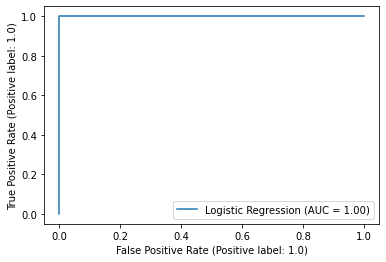

In [141]:
plot_roc_curve(model7,X_selected_features_l1, y_selected_l1_binary, name = 'Logistic Regression')

##### (b) ii

Using pvalue's logistic regression performs better as it has a higher score. It's easier to implement the L1-penalized logistic regression for selecting features though.

##### (c) i  L1 Penalized Multinomial Regression

In [ ]:
# define a function to get training part of y data so that the class number won't be normalized
def get_y_train(series):
    y_mul_test=pd.concat([y_mul.iloc[0:2],y_mul.iloc[7:9],y_mul.iloc[13:16],y_mul.iloc[28:31],
                y_mul.iloc[43:46],y_mul.iloc[58:61],y_mul.iloc[73:76]])
    y_mul_train= y_mul.loc[y_mul.index.difference(y_mul_test.index)]
    return y_mul_train

In [220]:
budget_list_mul=[]
score_l1_mul=[]
cross_validation_score_mul=[]
norm_mul = MinMaxScaler()
for times in range(1,21):
    x_mul = get_table(times) # use the function I create above
    x_mul['target']= x_mul.class_label.astype('category').cat.codes # create category number for multiclass
    # reference: https://python.plainenglish.io/a32-multi-class-classification-using-logistic-regression-96eb692db8fa
    y_mul= x_mul['target']
    x_mul=x_mul.drop(['class_label','target'],axis=1)
    x_mul.columns = x_mul.columns.astype(str)
    x_norm_mul = norm_mul.fit_transform(x_mul)
    x_norm_mul=pd.DataFrame(x_norm_mul)
    x_norm_mul.columns = x_norm_mul.columns.astype(str)
    Y_mul= get_y_train(y_mul)# we need to get the train for y separately
    X_mul =get_train(x_norm_mul) # we need to select the training set right? Yes capital letter X
    model_mul = LogisticRegressionCV(cv=5,penalty='l1',multi_class='multinomial',solver='saga',max_iter=10000)
    model_mul.fit(X_mul.iloc[0::,::],Y_mul)# splitting the X and y here of each training dataset
    score_l1_mul.append(model_mul.score(X_mul.iloc[0::,::],Y_mul)) # model score
    budget_list_mul.append(model_mul.C_) # get budget or lambda value
    accuracy_mul = cross_val_score(model_mul, X_mul.iloc[0::,::],Y_mul, scoring='accuracy', cv = 5)
    mean_accuracy_mul = accuracy_mul.mean()# get the mean of accuracy score
    # reference: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85
    cross_validation_score_mul.append(mean_accuracy_mul)
#print(budget_list_mul)
#print(score_l1_mul)
print(cross_validation_score_mul)

[0.8120879120879121, 0.8703296703296702, 0.8263736263736263, 0.8263736263736263, 0.7967032967032968, 0.8406593406593407, 0.8406593406593406, 0.7967032967032968, 0.8120879120879121, 0.8406593406593406, 0.7824175824175824, 0.7824175824175825, 0.8120879120879121, 0.7967032967032966, 0.8263736263736263, 0.8285714285714285, 0.810989010989011, 0.7692307692307693, 0.7692307692307693, 0.7835164835164835]


In [221]:
cross_validation_score_mul.index(max(cross_validation_score_mul))

1

Therefore, the best break time for L1 Penalized Multinomial Regression is 2.

In [222]:
x_mul = get_table(2) # use the function I create above
x_mul['target']= x_mul.class_label.astype('category').cat.codes # create category number for multiclass
# reference: https://python.plainenglish.io/a32-multi-class-classification-using-logistic-regression-96eb692db8fa
y_mul= x_mul['target']
x_mul=x_mul.drop(['class_label','target'],axis=1)
x_mul.columns = x_mul.columns.astype(str)
x_norm_mul = norm_mul.fit_transform(x_mul)
x_norm_mul=pd.DataFrame(x_norm_mul)
x_norm_mul.columns = x_norm_mul.columns.astype(str)
Y_mul= get_y_train(y_mul)# we need to get the train for y separately
X_mul =get_train(x_norm_mul) # we need to select the training set right? Yes capital letter X
model_mul = LogisticRegressionCV(cv=5,penalty='l1',multi_class='multinomial',solver='saga',max_iter=10000)
model_mul.fit(X_mul.iloc[0::,::],Y_mul)# splitting the X and y here of each training dataset
x_test_mul=x_norm_mul.loc[x_norm_mul.index.difference(X_mul.index)] # x test
y_test_mul=y_mul.loc[y_mul.index.difference(Y_mul.index)] # y test
y_pred_mul = model_mul.predict(x_test_mul)
cnf_matrix_mul_test = metrics.confusion_matrix(y_test_mul, y_pred_mul)
cnf_matrix_mul_test
# on testing data

array([[3, 0, 0, 1, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 3]])

In [245]:
y_pred_mul_train=model_mul.predict(X_mul)
cnf_matrix_mul_train = metrics.confusion_matrix(Y_mul, y_pred_mul_train)
cnf_matrix_mul_train

array([[ 9,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  0, 12]])

The confusion matrix for multiclasses is defined as predicted values if you read it horizontally and as actual values if you read it vertically. For instance, for the bending class, in the test dataset, 4 are bending and 3 are actually predicted to be bending. 1 is predicted to be sitting. So True Positive for the class bending is 3. False Negative for the class bending is 1. False Positive is 1 (adding the first column of zeros except [1,1]). True Negative is the sum of the remaining numbers which add up to 14.

The test error is equal to 1-accuracy score. And we have the accuracy score just in the above list.

In [225]:
test_err_mul = 1-0.8703296703296702 # get the accuracy score from the just above list when breaking time series
print('The test error is ',test_err_mul)

The test error is  0.12967032967032976


ROC curves under multiclass case is defined as one vs all. For ROC is designed for binary classifications. We use OVO, which stands for One-vs-one. It computes the average AUC of all possible pairwise combinations of classes.
reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

In [266]:
from sklearn.metrics import roc_auc_score
print('The average ovo AUC score we get is ',roc_auc_score(y_test_mul, model_mul.predict_proba(x_test_mul),multi_class='ovo'))

The average ovo AUC score we get is  0.9472222222222223


##### (c) ii Multinomial Naive Bayes' Classifier

In [233]:
from sklearn.naive_bayes import MultinomialNB
cross_validation_score_mul_nb=[]
norm_mul_nb = MinMaxScaler()
for times in range(1,21): # break time series again!!!
    x_mul_nb = get_table(times) # use the function I create above
    x_mul_nb['target']= x_mul_nb.class_label.astype('category').cat.codes # create category number for multiclass
    # reference: https://python.plainenglish.io/a32-multi-class-classification-using-logistic-regression-96eb692db8fa
    y_mul_nb= x_mul_nb['target']
    x_mul_nb=x_mul_nb.drop(['class_label','target'],axis=1)
    x_mul_nb.columns = x_mul_nb.columns.astype(str)
    x_norm_mul_nb = norm_mul_nb.fit_transform(x_mul_nb)
    x_norm_mul_nb=pd.DataFrame(x_norm_mul_nb)
    x_norm_mul_nb.columns = x_norm_mul_nb.columns.astype(str)
    Y_mul_nb= get_y_train(y_mul_nb)# we need to get the train for y separately
    X_mul_nb =get_train(x_norm_mul_nb) # we need to select the training set right? Yes capital letter X
    model_mul_nb = MultinomialNB()
    model_mul_nb.fit(X_mul_nb.iloc[0::,::],Y_mul_nb)# splitting the X and y here of each training dataset
    #score_l1_mul.append(model_mul_nb.score(X_mul_nb.iloc[0::,::],Y_mul_nb)) # model score
    #budget_list_mul.append(model_mul.C_) # get budget or lambda value
    accuracy_mul_nb = cross_val_score(model_mul_nb, X_mul_nb.iloc[0::,::],Y_mul_nb, scoring='accuracy', cv = 5)
    mean_accuracy_mul_nb = accuracy_mul_nb.mean()# get the mean of accuracy score
    # reference: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85
    cross_validation_score_mul_nb.append(mean_accuracy_mul_nb)
print(cross_validation_score_mul_nb)

[0.6516483516483517, 0.665934065934066, 0.7230769230769231, 0.7230769230769231, 0.7384615384615385, 0.7087912087912087, 0.7241758241758243, 0.7384615384615385, 0.7395604395604395, 0.7384615384615385, 0.7241758241758243, 0.7252747252747253, 0.7087912087912088, 0.7098901098901098, 0.7098901098901098, 0.7395604395604396, 0.7241758241758243, 0.6956043956043956, 0.7098901098901098, 0.7241758241758243]


In [271]:
cross_validation_score_mul_nb.index(max(cross_validation_score_mul_nb))

15

Therefore, the best break time for Multinomial Naive Bayes is 16.

In [276]:
test_err_mul_nb = 1-max(cross_validation_score_mul_nb) # get the accuracy score from the just above list when breaking time series
print('The test error of Multinomial Naive Bayes is ',test_err_mul_nb)

The test error of Multinomial Naive Bayes is  0.2604395604395604


In [240]:
x_mul_nb = get_table(16) # use the function I create above
x_mul_nb['target']= x_mul_nb.class_label.astype('category').cat.codes # create category number for multiclass
# reference: https://python.plainenglish.io/a32-multi-class-classification-using-logistic-regression-96eb692db8fay_mul_nb= x_mul_nb['target']
x_mul_nb=x_mul_nb.drop(['class_label','target'],axis=1)
x_mul_nb.columns = x_mul_nb.columns.astype(str)
x_norm_mul_nb = norm_mul_nb.fit_transform(x_mul_nb)
x_norm_mul_nb=pd.DataFrame(x_norm_mul_nb)
x_norm_mul_nb.columns = x_norm_mul_nb.columns.astype(str)
Y_mul_nb= get_y_train(y_mul_nb)# we need to get the train for y separately
X_mul_nb =get_train(x_norm_mul_nb) # we need to select the training set right? Yes capital letter X
model_mul_nb = MultinomialNB()
model_mul_nb.fit(X_mul_nb.iloc[0::,::],Y_mul_nb)
y_pred_nb_mul = model_mul_nb.predict(X_mul_nb)
cnf_matrix_mul_nb_train = metrics.confusion_matrix(Y_mul_nb, y_pred_nb_mul)
cnf_matrix_mul_nb_train
# on training data

array([[ 8,  0,  0,  1,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 0,  2,  7,  0,  3,  0],
       [ 1,  0,  0, 10,  1,  0],
       [ 0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  0, 12]])

In [241]:
x_test_mul_nb=x_norm_mul_nb.loc[x_norm_mul_nb.index.difference(X_mul_nb.index)] # x test
y_test_mul_nb=y_mul_nb.loc[y_mul_nb.index.difference(Y_mul_nb.index)] # y test
y_pred_nb_mul = model_mul_nb.predict(x_test_mul_nb)
cnf_matrix_mul_nb_test = metrics.confusion_matrix(y_test_mul_nb, y_pred_nb_mul)
cnf_matrix_mul_nb_test
#on testing data

array([[4, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0],
       [0, 0, 0, 2, 1, 0],
       [0, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 3]])

In [268]:
print('The average ovo AUC score we get for Mulinomial Naive Bayes is ',roc_auc_score(y_test_mul_nb, model_mul_nb.predict_proba(x_test_mul_nb),multi_class='ovo'))

The average ovo AUC score we get for Mulinomial Naive Bayes is  0.9814814814814815


##### Gaussian Naive Bayes

In [234]:
from sklearn.naive_bayes import GaussianNB
cross_validation_score_gau_nb=[]
norm_gau_nb = MinMaxScaler()
for times in range(1,21): # break time series again!!!
    x_gau_nb = get_table(times) # use the function I create above
    x_gau_nb['target']= x_gau_nb.class_label.astype('category').cat.codes # create category number for multiclass
    # reference: https://python.plainenglish.io/a32-multi-class-classification-using-logistic-regression-96eb692db8fa
    y_gau_nb= x_gau_nb['target']
    x_gau_nb=x_gau_nb.drop(['class_label','target'],axis=1)
    x_gau_nb.columns = x_gau_nb.columns.astype(str)
    x_norm_gau_nb = norm_gau_nb.fit_transform(x_gau_nb)
    x_norm_gau_nb=pd.DataFrame(x_norm_gau_nb)
    x_norm_gau_nb.columns = x_norm_gau_nb.columns.astype(str)
    Y_gau_nb= get_y_train(y_gau_nb)# we need to get the train for y separately
    X_gau_nb =get_train(x_norm_gau_nb) # we need to select the training set right? Yes capital letter X
    model_gau_nb = GaussianNB()
    model_gau_nb.fit(X_gau_nb.iloc[0::,::],Y_gau_nb)# splitting the X and y here of each training dataset
    accuracy_gau_nb = cross_val_score(model_gau_nb, X_gau_nb.iloc[0::,::],Y_mul_nb, scoring='accuracy', cv = 5)
    mean_accuracy_gau_nb = accuracy_gau_nb.mean()# get the mean of accuracy score
    # reference: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85
    cross_validation_score_gau_nb.append(mean_accuracy_gau_nb)
print(cross_validation_score_gau_nb)

[0.7813186813186812, 0.7549450549450549, 0.7395604395604395, 0.7252747252747253, 0.8417582417582418, 0.7395604395604396, 0.7109890109890109, 0.7549450549450549, 0.7692307692307693, 0.754945054945055, 0.754945054945055, 0.8131868131868133, 0.6967032967032967, 0.7703296703296703, 0.7846153846153847, 0.756043956043956, 0.7417582417582418, 0.7549450549450549, 0.7417582417582418, 0.7131868131868131]


In [242]:
cross_validation_score_gau_nb.index(max(cross_validation_score_gau_nb))

4

Therefore, the best break time is 5 for Gaussian Naive Bayes.

In [247]:
test_err_gau_nb = 1-max(cross_validation_score_gau_nb) # get the accuracy score from the just above list when breaking time series
print('The test error for Gaussian Naive Bayes is ',test_err_gau_nb)

The test error for Gaussian Naive Bayes is  0.15824175824175823


In [243]:
x_gau_nb = get_table(5) # use the function I create above
x_gau_nb['target']= x_gau_nb.class_label.astype('category').cat.codes # create category number for multiclass
# reference: https://python.plainenglish.io/a32-multi-class-classification-using-logistic-regression-96eb692db8fay_mul_nb= x_mul_nb['target']
x_gau_nb=x_gau_nb.drop(['class_label','target'],axis=1)
x_gau_nb.columns = x_gau_nb.columns.astype(str)
x_norm_gau_nb = norm_gau_nb.fit_transform(x_gau_nb)
x_norm_gau_nb=pd.DataFrame(x_norm_gau_nb)
x_norm_gau_nb.columns = x_norm_gau_nb.columns.astype(str)
Y_gau_nb= get_y_train(y_gau_nb)# we need to get the train for y separately
X_gau_nb =get_train(x_norm_gau_nb) # we need to select the training set right? Yes capital letter X
model_gau_nb = GaussianNB()
model_gau_nb.fit(X_gau_nb.iloc[0::,::],Y_gau_nb)
y_pred_nb_gau = model_gau_nb.predict(X_gau_nb)
cnf_matrix_gau_nb_train = metrics.confusion_matrix(Y_gau_nb, y_pred_nb_gau)
cnf_matrix_gau_nb_train
# on training data

array([[ 8,  0,  1,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  1, 11,  0],
       [ 0,  0,  0,  0,  0, 12]])

In [244]:
x_test_gau_nb=x_norm_gau_nb.loc[x_norm_gau_nb.index.difference(X_gau_nb.index)] # x test
y_test_gau_nb=y_gau_nb.loc[y_gau_nb.index.difference(Y_gau_nb.index)] # y test
y_pred_nb_gau = model_gau_nb.predict(x_test_gau_nb)
cnf_matrix_gau_nb_test = metrics.confusion_matrix(y_test_gau_nb, y_pred_nb_gau)
cnf_matrix_gau_nb_test
#on testing data

array([[4, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 2, 1, 0],
       [0, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 3]])

In [269]:
print('The average AUC score we get for Gaussian Naive Bayes is ',roc_auc_score(y_test_gau_nb, model_gau_nb.predict_proba(x_test_gau_nb),multi_class='ovo'))
# the AUC score we get is this at below:

The average AUC score we get for Gaussian Naive Bayes is  0.9851851851851853


##### (c) iii Which multi-class classification is better in this case?
Gaussian Naive Bayes. It has higher AUC and accuracy scores.

##### 4.8.3

Taking the log of the posterior probability for the Bayes’ classifier，we get:

log(π_k)−log(σ_k)−μ_k^2/2σ_k^2+x*μk/σ_k^2−x^2/2σ_k^2

Therefore, in this case, Bayes Classifier is quadratic, not linear, as we have x^2.

##### 4.8.7

In [173]:
answer = (0.8*math.exp(-(1/72)*((4-10)**2)))/((0.8*math.exp(-(1/72)*((4-10)**2))+0.2*math.exp(-(1/72)*((4-0)**2))))
print('The probability of issuing a dividend given X is 4 last year is '+str(answer))

The probability of issuing a dividend given X is 4 last year is 0.7518524532975261
